# <배틀그라운드 뉴비, 치킨 못먹어도 Top10은 쉽게 하자!>

# 1. 주제 선정

- 지금까지 웹이나 유튜브에 올라오는 배틀그라운드 전략들은 에임실력이 좋은 플레이어를 대상으로 한 1등을 취하기 위한 전략이 많았음. 
- 배틀그라운드를 처음 접하는 뉴비를 대상으로 한 top10에 안정적으로 들 수 있는 효율적인 생존전략이 궁금했다.

- 본 EDA프로젝트를 통해 알아보고자 하는 것은 다음과 같다.
    - 1. 플레이어의 생존에 큰 영향을 미치는 핵심 Feature는 무엇인가. 
    - 2. 뉴비 플레이어가 안정적으로 top10에 들기 위해서는 어떻게 플레이해야할까?
        - 1) 솔로, 듀오, 스쿼드 3가지 모드 중 어떤 모드에서 뉴비가 오랫동안 생존하기 좋은가.
        - 2) 안정적으로 top10에 들기 위해 게임당 적에게 줘야할 데미지, 최소 몇 킬을 기록해야 하는가.
        - 3) 게임당 부스트아이템, 회복아이템은 얼마나 써야 하는가.
        - 4) 플레이어의 생존 확률을 높이기 위한 효율적인 이동전략은 무엇인가.
        

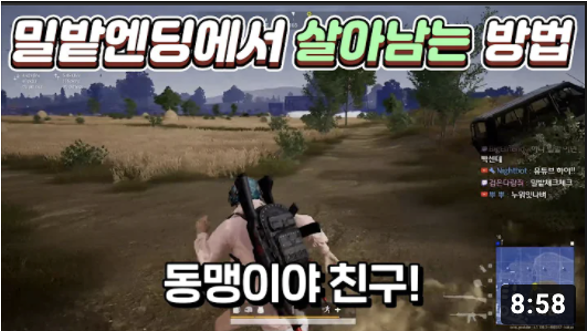, 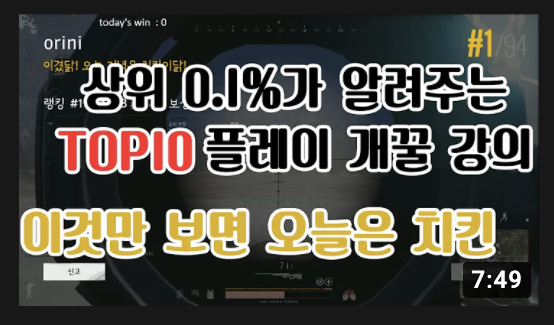

## 1-1. 데이터 출처

#### 데이터는 캐글 데이터를 사용했다.

https://www.kaggle.com/leonardokarl/pubg-statisctic

---

# 2. 데이터 탐색 및 전처리

### 필요한 모듈 불러오기

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
import re

print("pandas version: ", pd.__version__)
pd.set_option('display.max_columns', 150)

pandas version:  1.2.4


## 2-1 데이터셋

### 데이터 불러오기 및 합치기

In [2]:
solo = pd.read_csv("solo.csv",index_col=0)
duo = pd.read_csv("duo.csv",index_col=0)
squad = pd.read_csv("squad.csv",index_col=0)

In [3]:
solo['GameMode'] = 'solo'
duo['GameMode'] = 'duo'
squad['GameMode'] = 'squad'

total = pd.concat([solo,duo,squad]).reset_index(drop=True)
total

player_name  KillDeathRatio  WinRatio  TimeSurvived  RoundsPlayed  \
0           BreakNeck            3.14     17.65      18469.14            17   
1           Blackwalk            4.41     18.18      33014.86            33   
2       mercedes_benz            3.60      0.00       4330.44             5   
3                DORA           14.00     50.00      13421.82             8   
4             n2tstar           10.50     33.33       9841.04             6   
...               ...             ...       ...           ...           ...   
263689      SaikoMene            0.94      3.57      61987.40            56   
263690        KARUKOR            1.42      8.70      90025.75            92   
263691      Dertydann            0.90      1.46     126889.24           137   
263692       Neferhor            2.88     15.95     220702.25           163   
263693  pepperedangus            0.84      2.41     157247.36           166   

        Wins  WinTop10Ratio  Top10s  Top10Ratio  Losses   Rating  BestRating  \
0          3           0.83       4        23.5      14  1559.78     1415.79   
1          6           0.36      11        33.3      27  1884.53     1860.74   
2          0           0.00       1        20.0       5  1255.92     1266.60   
3          4           0.67       6        75.0       4  1798.70     1765.13   
4          2           0.40       5        83.3       4  1668.67     1616.58   
...      ...            ...     ...         ...     ...      ...         ...   
263689     2           0.05      23        41.1      54  1625.68     1648.14   
263690     8           0.07      37        40.2      84  1912.70     1923.01   
263691     2           0.18      41        29.9     135  1727.56     1758.74   
263692    26           0.41     104        63.8     137  2311.01     2311.73   
263693     4           0.05      46        27.7     162  1548.62     1562.32   

        DamagePg  HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  \
0         255.36             0.65     1.94     2.59         3321.28   
1         393.04             1.27     1.82     3.61         5021.41   
2         329.76             0.60     1.00     3.60         2804.80   
3         751.95             0.50     1.00     7.00         5986.82   
4         637.48             1.50     2.00     7.00         6526.96   
...          ...              ...      ...      ...             ...   
263689    130.10             0.16     2.43     0.91         3775.38   
263690    156.96             0.14     1.55     1.29         2632.12   
263691    116.34             0.08     1.15     0.89         2804.78   
263692    348.90             0.47     2.44     2.42         5234.55   
263693    119.09             0.16     0.93     0.82         3015.69   

        RevivesPg  RoadKillsPg  TeamKillsPg  TimeSurvivedPg  Top10sPg  Kills  \
0            0.00         0.00         0.00         1086.42      0.24     44   
1            0.00         0.06         0.00         1000.45      0.33    119   
2            0.00         0.00         0.00          866.09      0.20     18   
3            0.00         0.00         0.00         1677.73      0.75     56   
4            0.00         0.00         0.00         1640.17      0.83     42   
...           ...          ...          ...             ...       ...    ...   
263689       0.27         0.00         0.11         1106.92      0.41     51   
263690       0.28         0.00         0.09          978.54      0.40    119   
263691       0.18         0.01         0.02          926.20      0.30    122   
263692       0.24         0.02         0.04         1354.00      0.64    395   
263693       0.17         0.01         0.05          947.27      0.28    136   

        Assists  Suicides  TeamKills  HeadshotKills  HeadshotKillRatio  \
0             1         0          0             11               0.25   
1             2         0          0             42               0.35   
2             1         0          0              3             

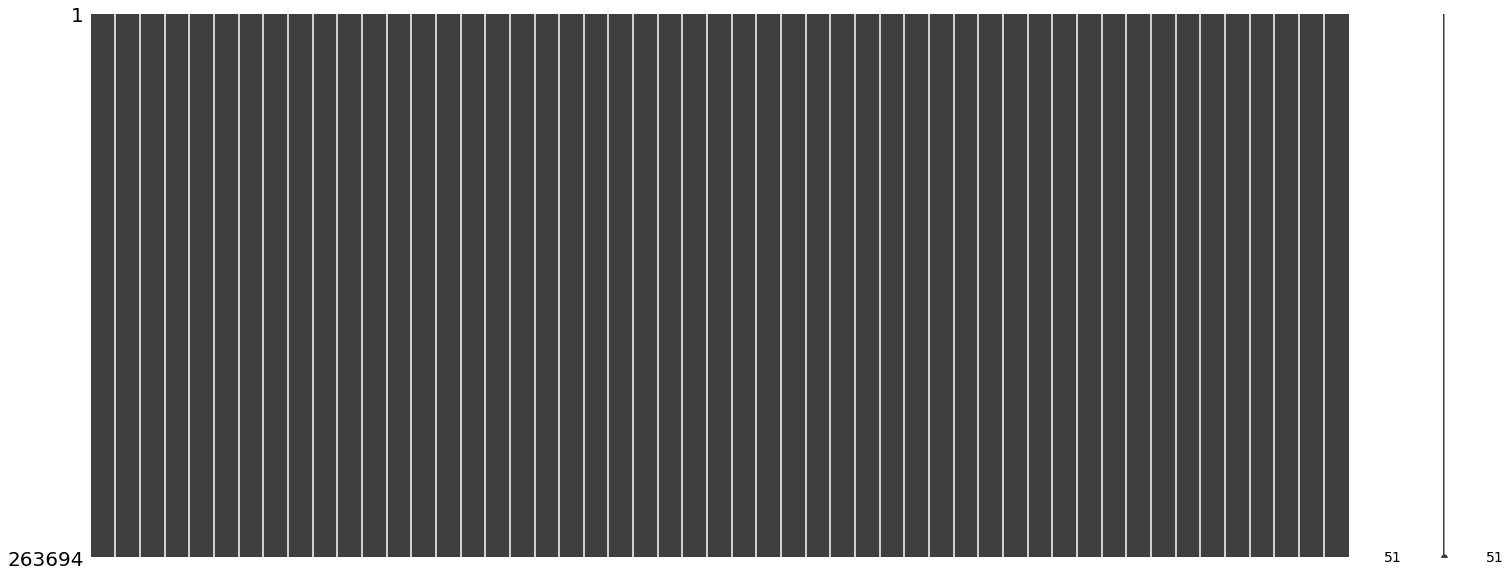

In [4]:
# 결측치 확인
msno.matrix(total)
plt.show()

## 2-2 데이터 전처리

#### 데이터 전처리하기

In [5]:
# 겹치거나 필요없는 column 삭제
total.drop(columns=['HeadshotKillRatio','Top10sPg','AvgSurvivalTime', 'AvgWalkDistance','AvgRideDistance'],inplace=True)


## eda에 필요한 컬럼 튜닝
# 플레이어의 게임당 평균 이동거리 컬럼 생성
total["WalkDistancePg"] =  total["WalkDistance"]/total["RoundsPlayed"]
total["RideDistancePg"] =  total["RideDistance"]/total["RoundsPlayed"]
# 우승확률 컬럼 생성
total["WinRatio"] =  total["Wins"]/total["RoundsPlayed"]
# 게임당 부스트아이템 사용갯수 컬럼 생성
total["BoostsPg"] = total["Boosts"] / total["RoundsPlayed"]
# 게임당 차량파괴 컬럼 생성
total["VehicleDestPg"] = total["VehicleDestroys"] / total["RoundsPlayed"]


In [6]:
# 50개의 컬럼 중에 여러개의 feature가 avg,ratio, count컬럼으로 중복되어 있음.
total

player_name  KillDeathRatio  WinRatio  TimeSurvived  RoundsPlayed  \
0           BreakNeck            3.14  0.176471      18469.14            17   
1           Blackwalk            4.41  0.181818      33014.86            33   
2       mercedes_benz            3.60  0.000000       4330.44             5   
3                DORA           14.00  0.500000      13421.82             8   
4             n2tstar           10.50  0.333333       9841.04             6   
...               ...             ...       ...           ...           ...   
263689      SaikoMene            0.94  0.035714      61987.40            56   
263690        KARUKOR            1.42  0.086957      90025.75            92   
263691      Dertydann            0.90  0.014599     126889.24           137   
263692       Neferhor            2.88  0.159509     220702.25           163   
263693  pepperedangus            0.84  0.024096     157247.36           166   

        Wins  WinTop10Ratio  Top10s  Top10Ratio  Losses   Rating  BestRating  \
0          3           0.83       4        23.5      14  1559.78     1415.79   
1          6           0.36      11        33.3      27  1884.53     1860.74   
2          0           0.00       1        20.0       5  1255.92     1266.60   
3          4           0.67       6        75.0       4  1798.70     1765.13   
4          2           0.40       5        83.3       4  1668.67     1616.58   
...      ...            ...     ...         ...     ...      ...         ...   
263689     2           0.05      23        41.1      54  1625.68     1648.14   
263690     8           0.07      37        40.2      84  1912.70     1923.01   
263691     2           0.18      41        29.9     135  1727.56     1758.74   
263692    26           0.41     104        63.8     137  2311.01     2311.73   
263693     4           0.05      46        27.7     162  1548.62     1562.32   

        DamagePg  HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  \
0         255.36             0.65     1.94     2.59         3321.28   
1         393.04             1.27     1.82     3.61         5021.41   
2         329.76             0.60     1.00     3.60         2804.80   
3         751.95             0.50     1.00     7.00         5986.82   
4         637.48             1.50     2.00     7.00         6526.96   
...          ...              ...      ...      ...             ...   
263689    130.10             0.16     2.43     0.91         3775.38   
263690    156.96             0.14     1.55     1.29         2632.12   
263691    116.34             0.08     1.15     0.89         2804.78   
263692    348.90             0.47     2.44     2.42         5234.55   
263693    119.09             0.16     0.93     0.82         3015.69   

        RevivesPg  RoadKillsPg  TeamKillsPg  TimeSurvivedPg  Kills  Assists  \
0            0.00         0.00         0.00         1086.42     44        1   
1            0.00         0.06         0.00         1000.45    119        2   
2            0.00         0.00         0.00          866.09     18        1   
3            0.00         0.00         0.00         1677.73     56        3   
4            0.00         0.00         0.00         1640.17     42        0   
...           ...          ...          ...             ...    ...      ...   
263689       0.27         0.00         0.11         1106.92     51       17   
263690       0.28         0.00         0.09          978.54    119       33   
263691       0.18         0.01         0.02          926.20    122       38   
263692       0.24         0.02         0.04         1354.00    395      106   
263693       0.17         0.01         0.05          947.27    136       27   

        Suicides  TeamKills  HeadshotKills  VehicleDestroys  RoadKills  \
0              0          0             11                0          0   
1              0          0             42                3          2   
2              0          0              3                0          0   
3 

In [7]:
# ratio를 기준으로 겹치는 컬럼을 제외하고 데이터셋 만들기
# pg(게임당), ratio컬럼 / avg(평균)컬럼 / 수치컬럼 구분하기

#정규표현식
pg_regexp = re.compile(r"Pg")
ratio_regexp = re.compile(r"Ratio")
avg_regexp = re.compile(r"Avg")

ls = total.columns
PgRatio_col = []
avg_col = []
normal_col = []

# ratio컬럼 / avg(평균)컬럼 / 일반 컬럼 나눠담기
for data in ls:
    if ratio_regexp.search(data):
        PgRatio_col.append(data)
    elif pg_regexp.search(data):
        PgRatio_col.append(data)
    elif avg_regexp.search(data):
        avg_col.append(data)
    else:
        normal_col.append(data)

        
# 플레이어 네임과 top10확률에 영향을 미칠 것으로 예상되는 컬럼들을 ratio컬럼에 추가했다.
ls_test = ['player_name','BestRating','Rating','DailyKills','WeeklyKills','RoundMostKills','MaxKillStreaks',
     'LongestTimeSurvived','LongestKill','GameMode']
for i in ls_test:
    PgRatio_col.append(i)

total_ratio = total[PgRatio_col]
total_ratio

KillDeathRatio  WinRatio  WinTop10Ratio  Top10Ratio  DamagePg  \
0                 3.14  0.176471           0.83        23.5    255.36   
1                 4.41  0.181818           0.36        33.3    393.04   
2                 3.60  0.000000           0.00        20.0    329.76   
3                14.00  0.500000           0.67        75.0    751.95   
4                10.50  0.333333           0.40        83.3    637.48   
...                ...       ...            ...         ...       ...   
263689            0.94  0.035714           0.05        41.1    130.10   
263690            1.42  0.086957           0.07        40.2    156.96   
263691            0.90  0.014599           0.18        29.9    116.34   
263692            2.88  0.159509           0.41        63.8    348.90   
263693            0.84  0.024096           0.05        27.7    119.09   

        HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  RevivesPg  \
0                  0.65     1.94     2.59         3321.28       0.00   
1                  1.27     1.82     3.61         5021.41       0.00   
2                  0.60     1.00     3.60         2804.80       0.00   
3                  0.50     1.00     7.00         5986.82       0.00   
4                  1.50     2.00     7.00         6526.96       0.00   
...                 ...      ...      ...             ...        ...   
263689             0.16     2.43     0.91         3775.38       0.27   
263690             0.14     1.55     1.29         2632.12       0.28   
263691             0.08     1.15     0.89         2804.78       0.18   
263692             0.47     2.44     2.42         5234.55       0.24   
263693             0.16     0.93     0.82         3015.69       0.17   

        RoadKillsPg  TeamKillsPg  TimeSurvivedPg  WalkDistancePg  \
0              0.00         0.00         1086.42     1701.430000   
1              0.06         0.00         1000.45     1450.568788   
2              0.00         0.00          866.09     1268.158000   
3              0.00         0.00         1677.73     2197.461250   
4              0.00         0.00         1640.17     2789.401667   
...             ...          ...             ...             ...   
263689         0.00         0.11         1106.92     1894.640000   
263690         0.00         0.09          978.54     1565.724674   
263691         0.01         0.02          926.20     1512.347007   
263692         0.02         0.04         1354.00     2025.640736   
263693         0.01         0.05          947.27     1559.862470   

        RideDistancePg  BoostsPg  VehicleDestPg    player_name  BestRating  \
0          1619.854706  1.705882       0.000000      BreakNeck     1415.79   
1          3570.840606  2.666667       0.090909      Blackwalk     1860.74   
2          1536.640000  0.600000       0.000000  mercedes_benz     1266.60   
3          3789.353750  3.000000       0.000000           DORA     1765.13   
4          3737.560000  3.500000       0.000000        n2tstar     1616.58   
...                ...       ...            ...            ...         ...   
263689     1880.738750  1.250000       0.017857      SaikoMene     1648.14   
263690     1066.392826  0.782609       0.010870        KARUKOR     1923.01   
263691     1292.428613  0.693431       0.014599      Dertydann     1758.74   
263692     3208.913067  1.944785       0.085890       Neferhor     2311.73   
263693     1455.828614  0.903614       0.000000  pepperedangus     1562.32   

         Rating  DailyKills  WeeklyKills  RoundMostKills  MaxKillStreaks  \
0       1559.78          13           19              13               1   
1       1884.53          18           18              13               3   
2       1255.92           1           18              10               1   
3       1798.70           8           48              14               2   
4       1668.67          15           29              13               3   
...         ...         ...          ...             ...

#### 그룹간 비교를 위해 데이터 범주화

In [8]:
# 범주화 함수 만들기
# 연속형데이터의 범주형 컬럼만들기 함수
def create_range_data(df, col, bins_start, bins_end, bins_jump):
    df[f'{col}_range'] = pd.cut(df[f'{col}'],
                               bins=range(bins_start,bins_end+bins_jump,bins_jump),
                               include_lowest=True,
                               labels=range(bins_start+bins_jump,bins_end+bins_jump,bins_jump))
# 만들어진 컬럼 드랍 함수   
def drop_col(df, col):
    df.drop([f'{col}_range'], axis=1, inplace=True)

    
# Kill/Death에 따른 플레이어그룹 범주화
total_ratio.loc[total_ratio['KillDeathRatio']<=1, 'K/D_category'] = "초보"
total_ratio.loc[(total_ratio['KillDeathRatio']>1)&(total_ratio['KillDeathRatio']<=2), 'K/D_category'] = "보통"
total_ratio.loc[(total_ratio['KillDeathRatio']>2)&(total_ratio['KillDeathRatio']<=3), 'K/D_category'] = "고수"
total_ratio.loc[total_ratio['KillDeathRatio']>3, 'K/D_category'] = "초고수"

# top10확률에 따른 플레이어그룹 범주화
create_range_data(total_ratio,'Top10Ratio',0,100,10)
total_ratio['WinRatio_GoodBad'] = 0
total_ratio.loc[total_ratio['Top10Ratio_range']>=40, 'WinRatio_GoodBad'] = "good"
total_ratio.loc[total_ratio['Top10Ratio_range']<=40, 'WinRatio_GoodBad'] = "bad"
drop_col(total_ratio,'Top10Ratio')

In [9]:
## top10 확률이 100%인 플레이어들은 플레이횟수가 적어 신뢰성이 낮은 데이터로 판단. 제거하자.

In [10]:
# 이상치 제거
total_ratio = total_ratio[total_ratio['Top10Ratio']!=100]
total_ratio

KillDeathRatio  WinRatio  WinTop10Ratio  Top10Ratio  DamagePg  \
0                 3.14  0.176471           0.83        23.5    255.36   
1                 4.41  0.181818           0.36        33.3    393.04   
2                 3.60  0.000000           0.00        20.0    329.76   
3                14.00  0.500000           0.67        75.0    751.95   
4                10.50  0.333333           0.40        83.3    637.48   
...                ...       ...            ...         ...       ...   
263689            0.94  0.035714           0.05        41.1    130.10   
263690            1.42  0.086957           0.07        40.2    156.96   
263691            0.90  0.014599           0.18        29.9    116.34   
263692            2.88  0.159509           0.41        63.8    348.90   
263693            0.84  0.024096           0.05        27.7    119.09   

        HeadshotKillsPg  HealsPg  KillsPg  MoveDistancePg  RevivesPg  \
0                  0.65     1.94     2.59         3321.28       0.00   
1                  1.27     1.82     3.61         5021.41       0.00   
2                  0.60     1.00     3.60         2804.80       0.00   
3                  0.50     1.00     7.00         5986.82       0.00   
4                  1.50     2.00     7.00         6526.96       0.00   
...                 ...      ...      ...             ...        ...   
263689             0.16     2.43     0.91         3775.38       0.27   
263690             0.14     1.55     1.29         2632.12       0.28   
263691             0.08     1.15     0.89         2804.78       0.18   
263692             0.47     2.44     2.42         5234.55       0.24   
263693             0.16     0.93     0.82         3015.69       0.17   

        RoadKillsPg  TeamKillsPg  TimeSurvivedPg  WalkDistancePg  \
0              0.00         0.00         1086.42     1701.430000   
1              0.06         0.00         1000.45     1450.568788   
2              0.00         0.00          866.09     1268.158000   
3              0.00         0.00         1677.73     2197.461250   
4              0.00         0.00         1640.17     2789.401667   
...             ...          ...             ...             ...   
263689         0.00         0.11         1106.92     1894.640000   
263690         0.00         0.09          978.54     1565.724674   
263691         0.01         0.02          926.20     1512.347007   
263692         0.02         0.04         1354.00     2025.640736   
263693         0.01         0.05          947.27     1559.862470   

        RideDistancePg  BoostsPg  VehicleDestPg    player_name  BestRating  \
0          1619.854706  1.705882       0.000000      BreakNeck     1415.79   
1          3570.840606  2.666667       0.090909      Blackwalk     1860.74   
2          1536.640000  0.600000       0.000000  mercedes_benz     1266.60   
3          3789.353750  3.000000       0.000000           DORA     1765.13   
4          3737.560000  3.500000       0.000000        n2tstar     1616.58   
...                ...       ...            ...            ...         ...   
263689     1880.738750  1.250000       0.017857      SaikoMene     1648.14   
263690     1066.392826  0.782609       0.010870        KARUKOR     1923.01   
263691     1292.428613  0.693431       0.014599      Dertydann     1758.74   
263692     3208.913067  1.944785       0.085890       Neferhor     2311.73   
263693     1455.828614  0.903614       0.000000  pepperedangus     1562.32   

         Rating  DailyKills  WeeklyKills  RoundMostKills  MaxKillStreaks  \
0       1559.78          13           19              13               1   
1       1884.53          18           18              13               3   
2       1255.92           1           18              10               1   
3       1798.70           8           48              14               2   
4       1668.67          15           29              13               3   
...         ...         ...          ...             ...

---

# 3. EDA 

## 1. 플레이어의 생존에 큰 영향을 미치는 핵심 Feature는 무엇인가. 

#### heatmap으로 top10컬럼과의 상관계수를 살펴보자.

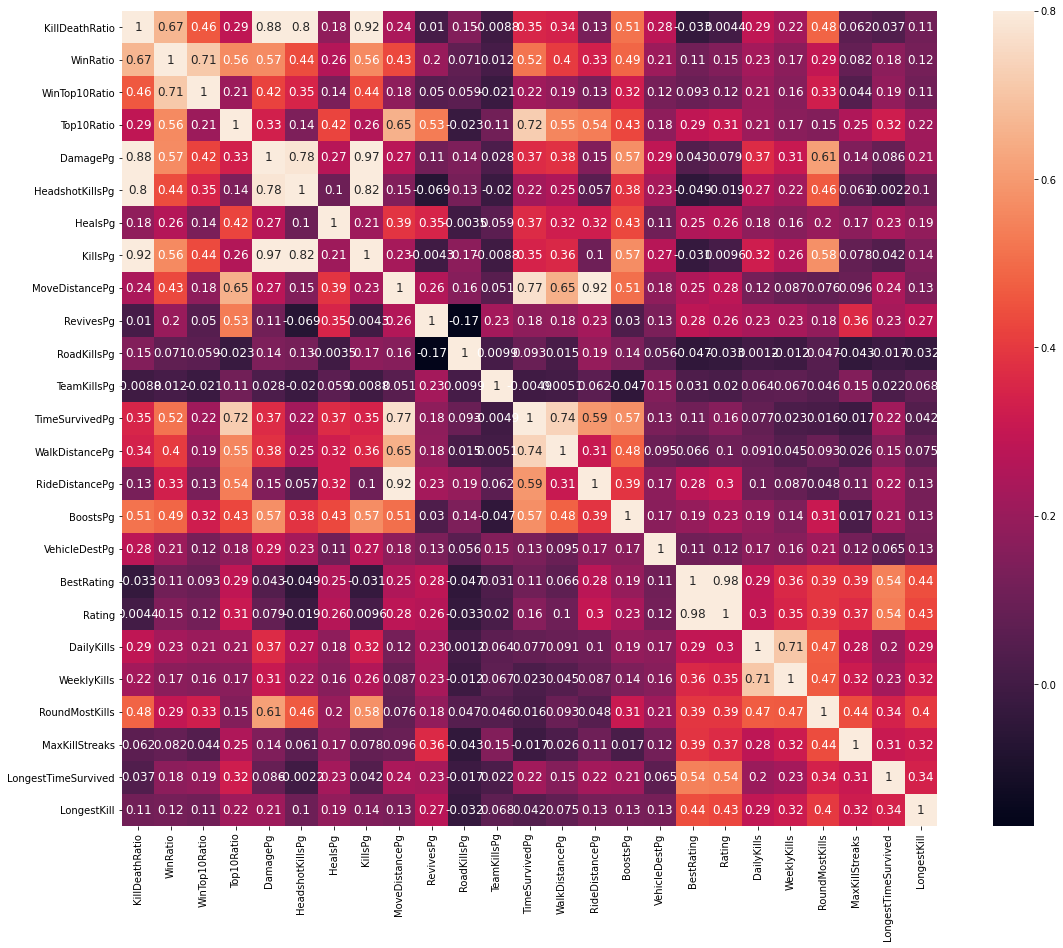

In [11]:
corrmat_total = total_ratio.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat_total, vmax=.8, square=True, annot=True, annot_kws={"size": 12});

#### top10 확률(Target)과의 상관계수가 0.3 이상인 컬럼을 뽑아보자.

In [12]:
modes = ['solo', 'duo', 'squad']
for mode in modes:
    globals()[f'corrmat_{mode}'] = total_ratio[total_ratio['GameMode']==mode].corr()

mode_ls = ['total', 'solo', 'duo', 'squad' ]
useful_col = []
for value in mode_ls:
    globals()[f"corrmat_{value}"]
    globals()[f"useful_col_{value}"] = globals()[f"corrmat_{value}"][globals()[f"corrmat_{value}"]["Top10Ratio"].values >= 0.3].index.tolist()

useful_col = list(set(useful_col_total  + useful_col_duo + useful_col_solo + useful_col_squad))
useful_col

['RideDistancePg',
 'TimeSurvivedPg',
 'DamagePg',
 'WinRatio',
 'Rating',
 'KillDeathRatio',
 'Top10Ratio',
 'KillsPg',
 'WalkDistancePg',
 'LongestTimeSurvived',
 'HeadshotKillsPg',
 'MoveDistancePg',
 'RevivesPg',
 'BoostsPg',
 'HealsPg']

#### *  이 중에
- 이동거리관련 컬럼 : WalkDistancePg, RideDistancePg, MoveDistancePg
- 아이템 사용관련 컬럼 : HealsPg, BoostsPg
- 조준실력(에임) 관련 컬럼 : DamagePg, KillsPg, KillDeathRatio
- 생존시간컬럼 : TimeSurvivedPg
#### 상기의 컬럼들을 살펴보자

### <주요 Feature 살펴보기>

###  1. 조준실력(에임) 관련 컬럼

#### - KillDeathRatio = 총 죽인횟수/총 죽은횟수 (에임 실력과 관련있는 컬럼)

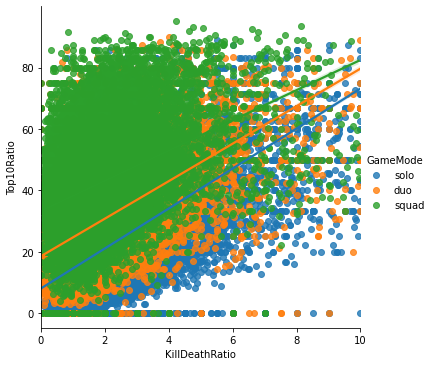

In [13]:
sns.lmplot(x="KillDeathRatio", y="Top10Ratio", hue="GameMode", 
           data=total_ratio[(total_ratio['KillDeathRatio']<=10)&(total_ratio['Top10Ratio']<=100)])

- 듀오, 스쿼드, 솔로 모두 탑10에 들어가는 비율과 양의 상관관계를 보인다.
- squad 선형 직선의 기울기가 가장 완만하다. => 게임모드를 sqaud로 할때, 에임(조준) 실력에 영향을 덜 받는다.

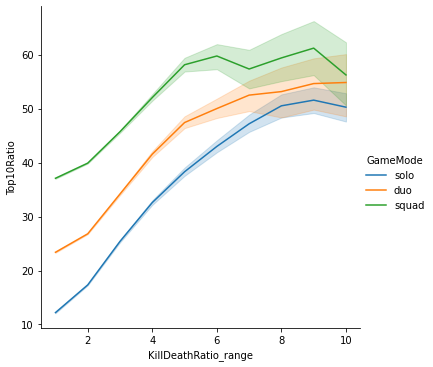

In [14]:
create_range_data(total_ratio, "KillDeathRatio", 0, 10, 1)
sns.relplot(x="KillDeathRatio_range", y="Top10Ratio", data=total_ratio, hue='GameMode', kind='line')
drop_col(total_ratio, "KillDeathRatio")

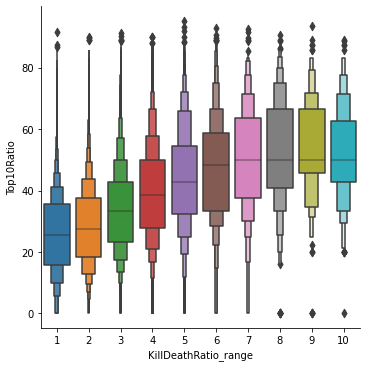

In [15]:
create_range_data(total_ratio, "KillDeathRatio", 0, 10, 1)


sns.catplot(x="KillDeathRatio_range", y="Top10Ratio", data=total_ratio, kind='boxen')
plt.show()

drop_col(total_ratio, "KillDeathRatio")

- 킬수가 많을수록 탑10에 들어갈 확률이 커진다.
- 하지만 kill수가 4명 이상이되면 탑10에 들어가는 확률에 미치는 영향이 줄어든다.
- 한판당 4~5명을 죽인다면 탑10에 들어갈 확률이 40% 이상

### cf) 궁금해요?

- 과연 게임판수가 늘어나면 에임실력도 좋아질까?

-0.17930205692176013


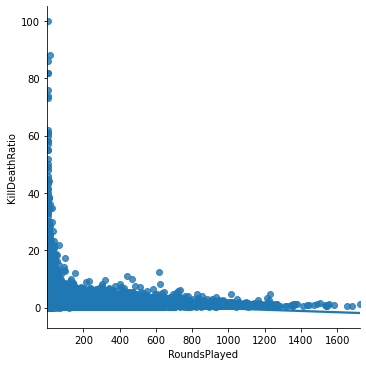

In [16]:
sns.lmplot(x="RoundsPlayed", y="KillDeathRatio", 
           data=total)
print(total['RoundsPlayed'].corr(total['KillDeathRatio']))

- 응 아니야~

#### - DamagePg = 게임 당 적에게 가한 데미지의 양

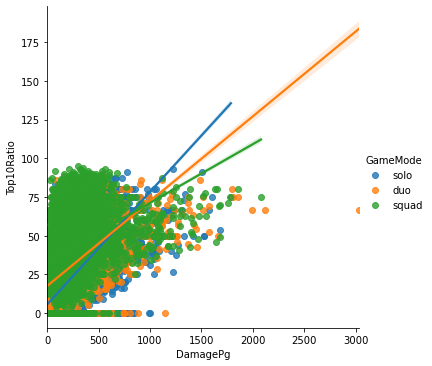

In [17]:
sns.lmplot(x="DamagePg", y="Top10Ratio", hue="GameMode", data=total_ratio)

- squad -> duo -> solo 순으로 DamagePg와 Top10Ratio가 강한 상관관계를 보인다.

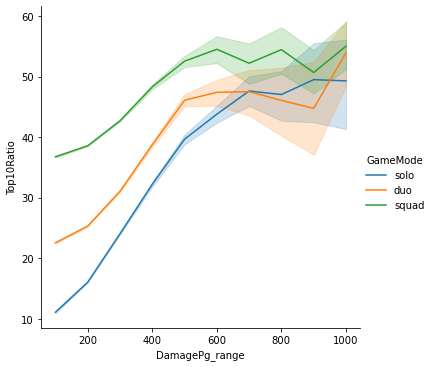

In [18]:
create_range_data(total_ratio, "DamagePg", 0, 1000, 100)
sns.relplot(x="DamagePg_range", y="Top10Ratio", data=total_ratio, hue='GameMode', kind='line')
drop_col(total_ratio, "DamagePg")

- 게임당 데미지를 최대 1000으로 제한하여 그래프를 그리면 상관관계가 더 명확해진다.
- 적에게 같은양의 Damage를 주었을 때 squad가 가장 높은 승률을 보여준다.
- 에임 실력이 떨어지는 플레이어에게는 스쿼드가 유리할 것으로 보임.

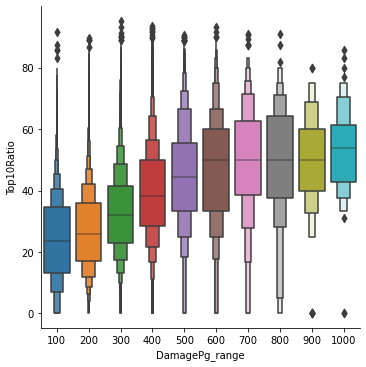

In [19]:
create_range_data(total_ratio, "DamagePg", 0, 1000, 100)


sns.catplot(x="DamagePg_range", y="Top10Ratio", data=total_ratio, kind='boxen')
plt.show()

drop_col(total_ratio, "DamagePg")

-  데미지와 top10확률 간에는 확실한 상관관계가 있지만, 데미지 500이상부터는 증가율이 미비함.

### 2. 아이템 활용 관련컬럼

#### - HealsPg = 게임 당 사용한 회복아이템의 갯수

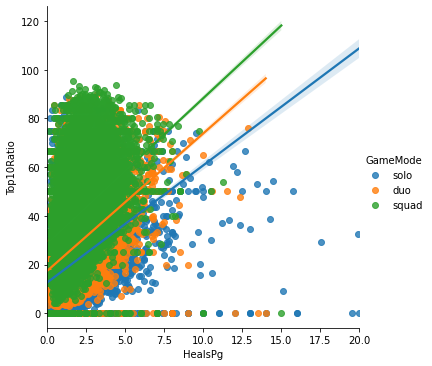

In [20]:
sns.lmplot(x="HealsPg", y="Top10Ratio", hue="GameMode", 
           data=total_ratio[(total_ratio['KillDeathRatio']<=10)&(total_ratio['Top10Ratio']<=100)])


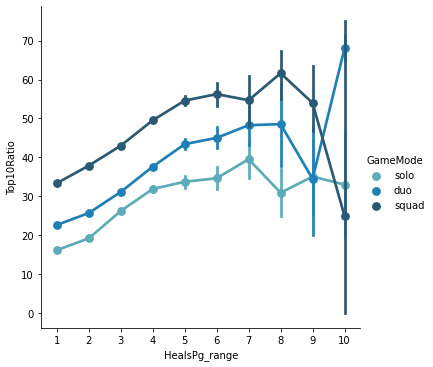

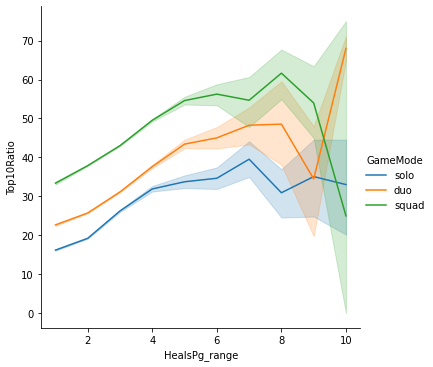

In [21]:
create_range_data(total_ratio, "HealsPg", 0, 10, 1)

sns.catplot(x="HealsPg_range", y="Top10Ratio", hue="GameMode", palette="YlGnBu_d", kind="point", data=total_ratio)
sns.relplot(x="HealsPg_range", y="Top10Ratio", data=total_ratio, hue='GameMode', kind='line')

drop_col(total_ratio, "HealsPg")

- heal아이템 사용갯수가 많아질수록 top10에 들 확률이 증가한다.
- 같은 Heal 아이템을 사용하더라도 squad 모드일 때 가장 높은 Top10 진입율을 보여준다.

#### - BoostsPg = 게임 당 사용한 부스트아이템의 갯수

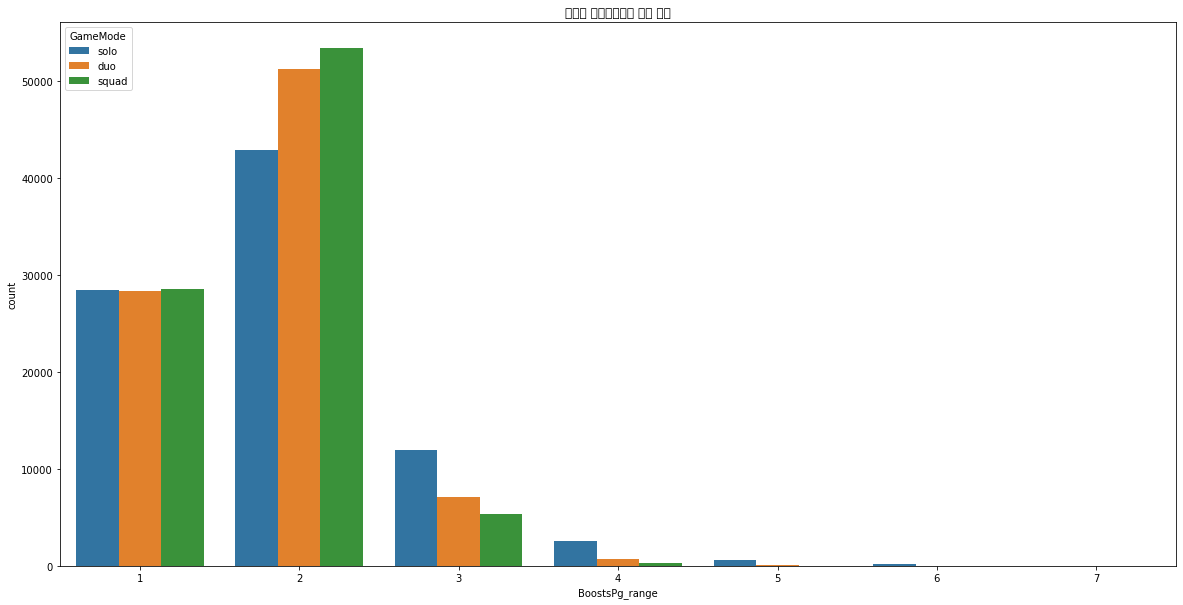

In [22]:
# 모드별 부스트아이템 사용갯수 분포
create_range_data(total_ratio,'BoostsPg',0,7,1)

plt.figure(figsize=(20,10))
sns.countplot('BoostsPg_range',data=total_ratio,hue='GameMode')
plt.title("모드별 부스트아이템 사용 분포")
plt.grid
plt.show()
drop_col(total_ratio, 'BoostsPg')

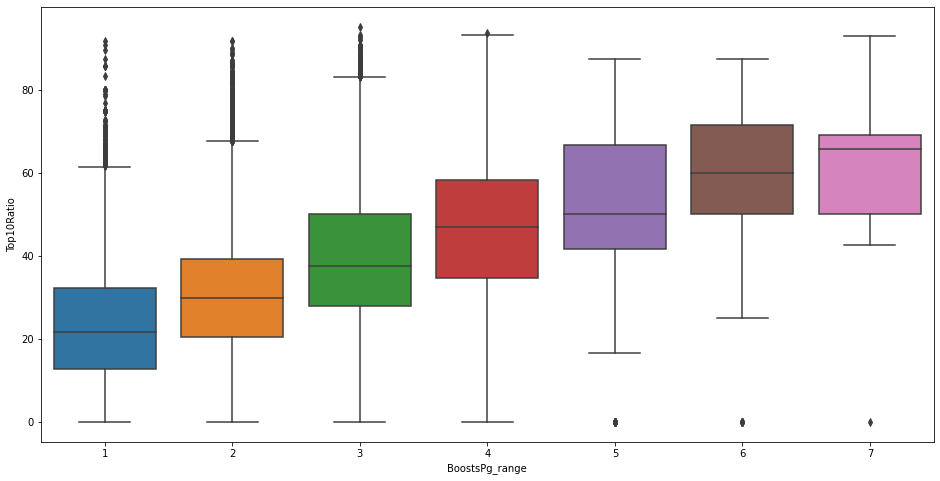

In [23]:
# 부스트 아이템 범주화 후 박스플롯

create_range_data(total_ratio,'BoostsPg',0,7,1)

plt.figure(figsize=(16,8))
sns.boxplot(x='BoostsPg_range',y='Top10Ratio', data=total_ratio)
plt.show()
drop_col(total_ratio, 'BoostsPg')

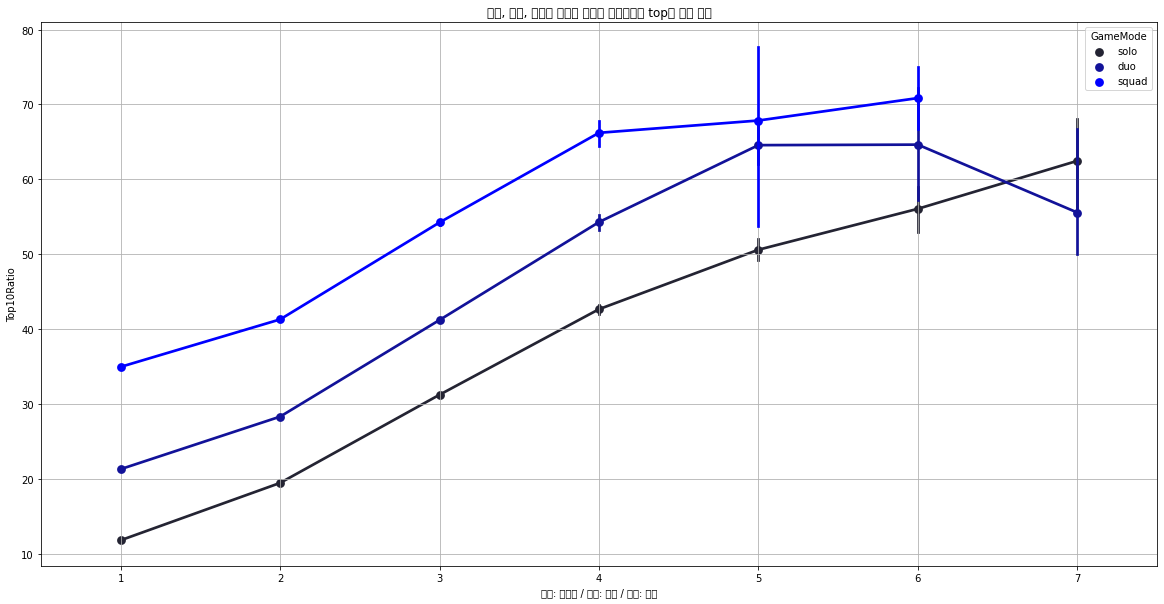

In [24]:
# 모드별 top10확률 비교
create_range_data(total_ratio,'BoostsPg',0,7,1)
plt.figure(figsize=(20,10))
sns.pointplot(x='BoostsPg_range',y='Top10Ratio',hue='GameMode', data=total_ratio,color='blue')
plt.title("솔로, 듀오, 스쿼드 부스트 아이템 사용갯수별 top률 변화 비교")
plt.xlabel("파랑: 스쿼드 / 남색: 듀오 / 검정: 솔로")
plt.grid()
plt.show()
drop_col(total_ratio, 'BoostsPg')

* 부스트아이템 사용갯수와 top10확률은 정비례한다.
* 같은갯수의 부스터아이템을 사용해도 스쿼드모드가 가장 top10확률이 높다.

### 이동거리 관련 컬럼

#### - MoveDistancePg = 게임 당 플레이어의 이동거리

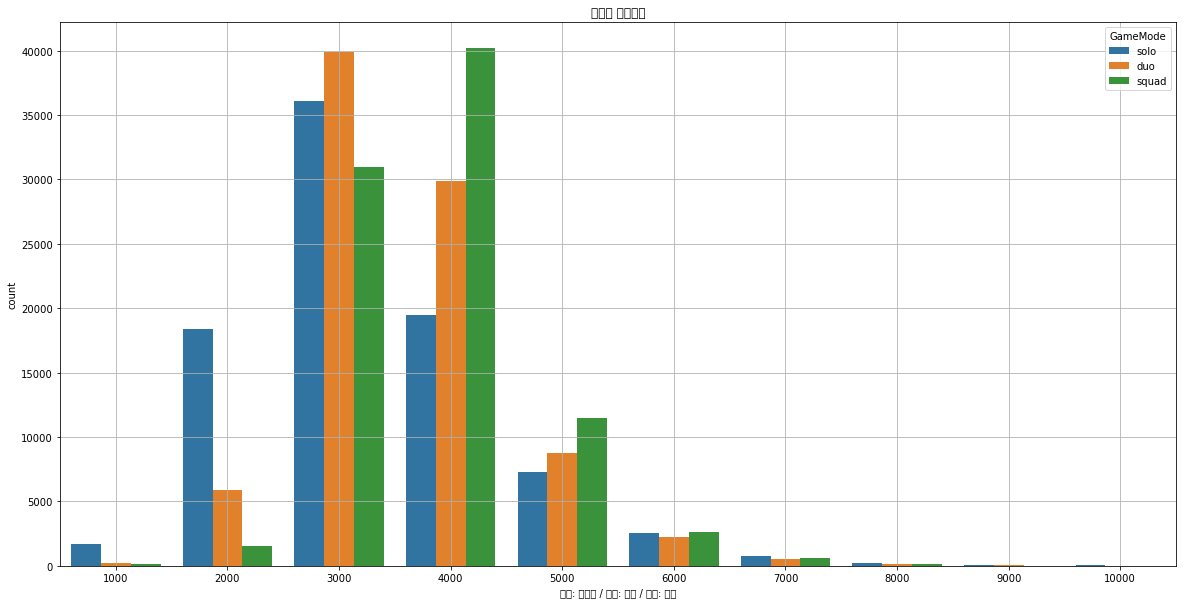

In [25]:
# 모드별 이동거리 CountPlot

create_range_data(total_ratio,"MoveDistancePg",0,10000,1000)
plt.figure(figsize=(20,10))
sns.countplot('MoveDistancePg_range',data=total_ratio,hue='GameMode')
plt.title("모드별 이동거리")
plt.xlabel("초록: 스쿼드 / 주황: 듀오 / 파랑: 솔로")
plt.grid()
plt.show()
drop_col(total_ratio,'MoveDistancePg')

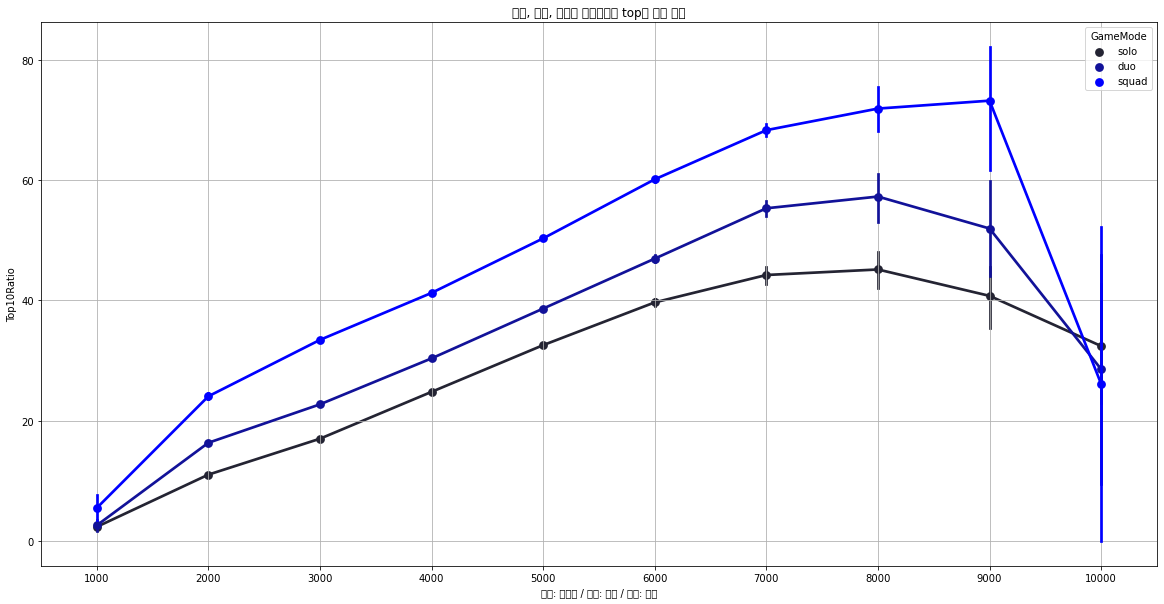

In [26]:
create_range_data(total_ratio,"MoveDistancePg",0,10000,1000)


plt.figure(figsize=(20,10))
sns.pointplot(x='MoveDistancePg_range',y='Top10Ratio',hue='GameMode', data=total_ratio,color='blue')
plt.title("솔로, 듀오, 스쿼드 이동거리당 top률 변화 비교")
plt.xlabel("파랑: 스쿼드 / 남색: 듀오 / 검정: 솔로")
plt.grid()
plt.show()
drop_col(total_ratio,'MoveDistancePg')

* 전반적으로 8000m까지 꾸준히 top10확률이 증가한다.
* 팀원이 많은 모드일수록 이동거리에 따라 top10확률이 크게 증가한다.

#### - WalkDistancePg = 게임 당 걸어서 이동한 거리

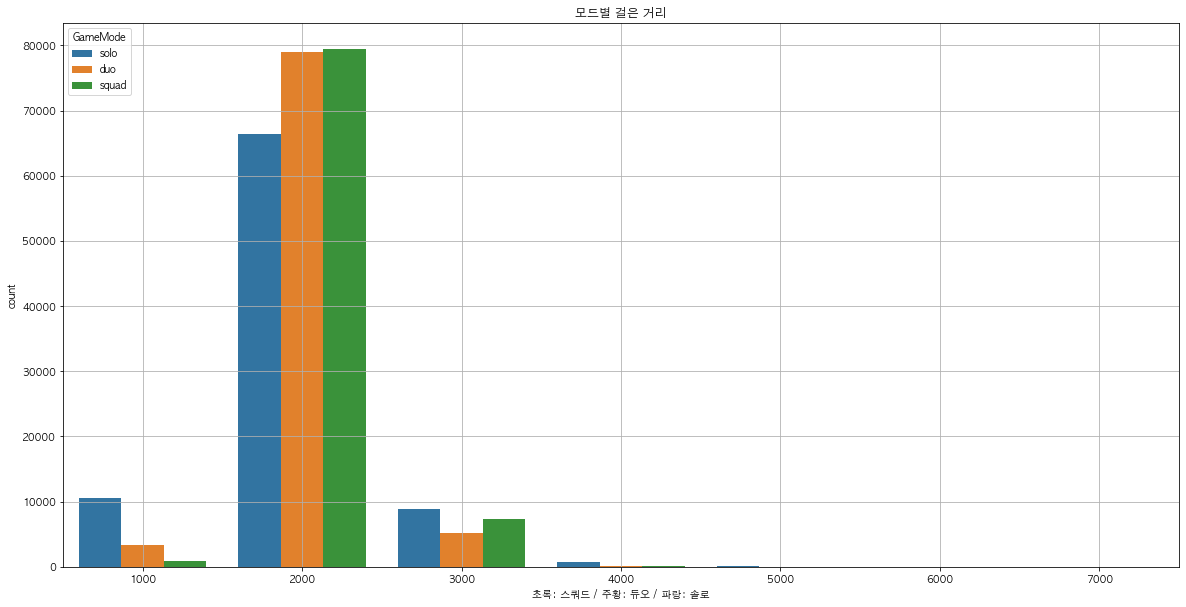

In [27]:
# 모드별 걸은 거리 CountPlot

plt.rcParams['font.family'] = 'AppleGothic'
create_range_data(total_ratio,"WalkDistancePg",0,7000,1000)

plt.figure(figsize=(20,10))
sns.countplot('WalkDistancePg_range',data=total_ratio,hue='GameMode')
plt.title("모드별 걸은 거리")
plt.xlabel("초록: 스쿼드 / 주황: 듀오 / 파랑: 솔로")
plt.grid()
plt.show()
drop_col(total_ratio,'WalkDistancePg')

* 플레이어들이 걸어서 이동한 거리는 대체로 4000m이내

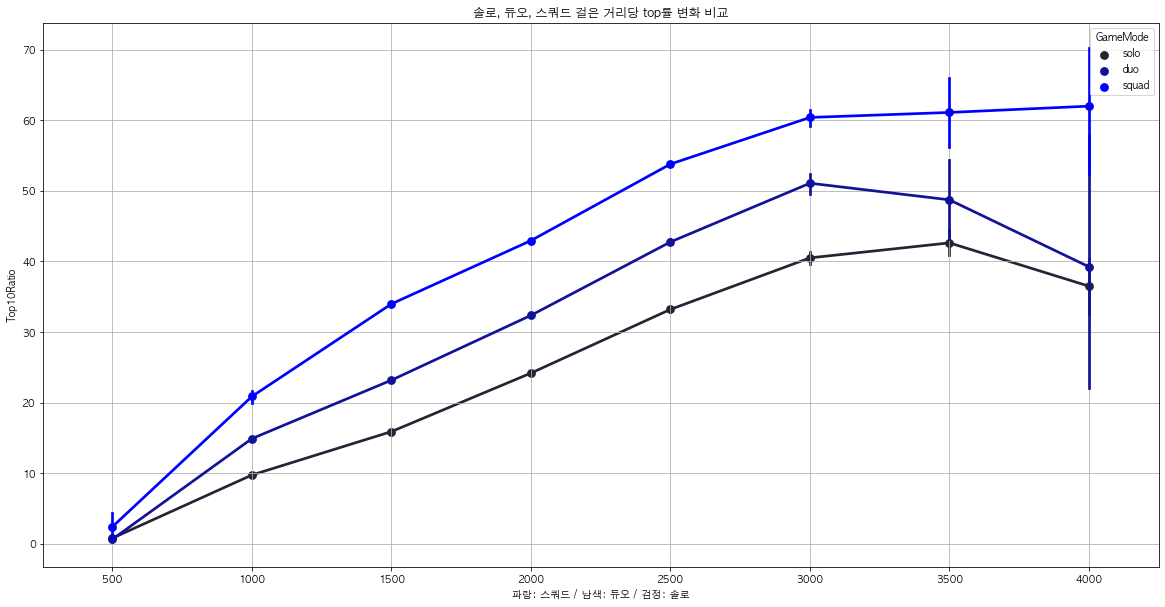

In [28]:

create_range_data(total_ratio,"WalkDistancePg",0,4000,500)
    
plt.figure(figsize=(20,10))
sns.pointplot(x='WalkDistancePg_range',y='Top10Ratio',hue='GameMode', data=total_ratio,color='blue')
plt.title("솔로, 듀오, 스쿼드 걸은 거리당 top률 변화 비교")
plt.xlabel("파랑: 스쿼드 / 남색: 듀오 / 검정: 솔로")
plt.grid()
plt.show()
drop_col(total_ratio,'WalkDistancePg')

* 걸어서 이동한 거리가 증가할수록 top10에 들어갈 확률도 증가한다.
* 팀원이 많은 모드일수록 상승폭이 가파르다.

#### - RideDistancePg = 게임 당 차를 타고 이동한 거리

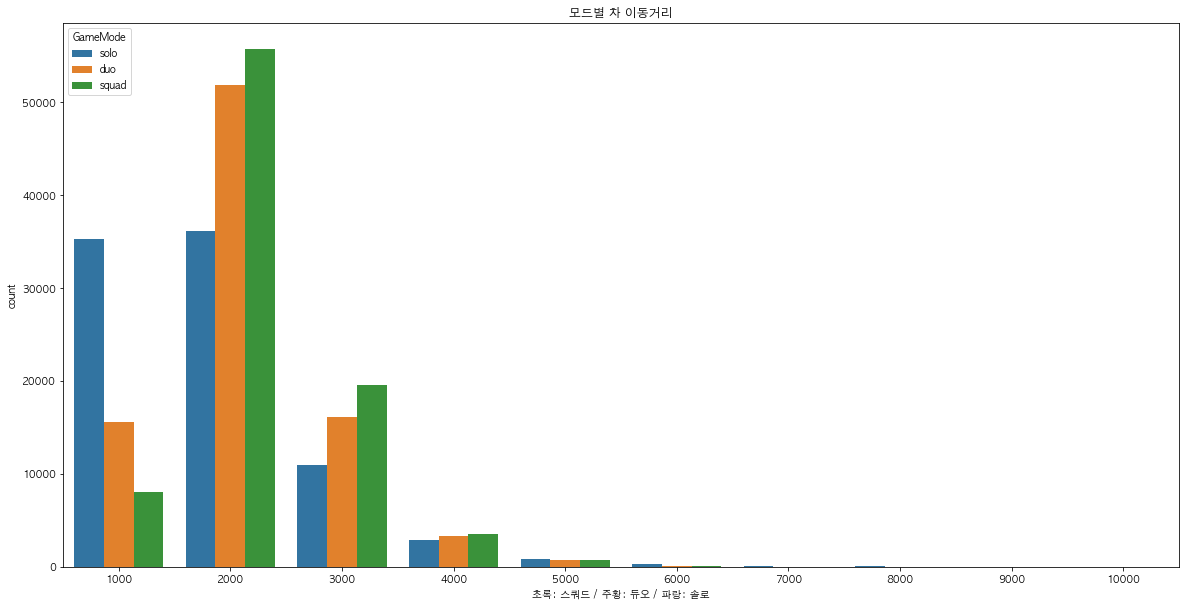

In [29]:
# 모드별 차 이동거리 CountPlot
plt.rcParams['font.family'] = 'AppleGothic'
create_range_data(total_ratio,"RideDistancePg",0,10000,1000)
plt.figure(figsize=(20,10))
sns.countplot('RideDistancePg_range',data=total_ratio,hue='GameMode')
plt.title("모드별 차 이동거리")
plt.xlabel("초록: 스쿼드 / 주황: 듀오 / 파랑: 솔로")
plt.grid
plt.show()
drop_col(total_ratio,'RideDistancePg')

* 팀원이 많은 모드일수록 차를 타고 이동하는 거리가 많다. 스쿼드에서 차를 가장 많이 이용한다.

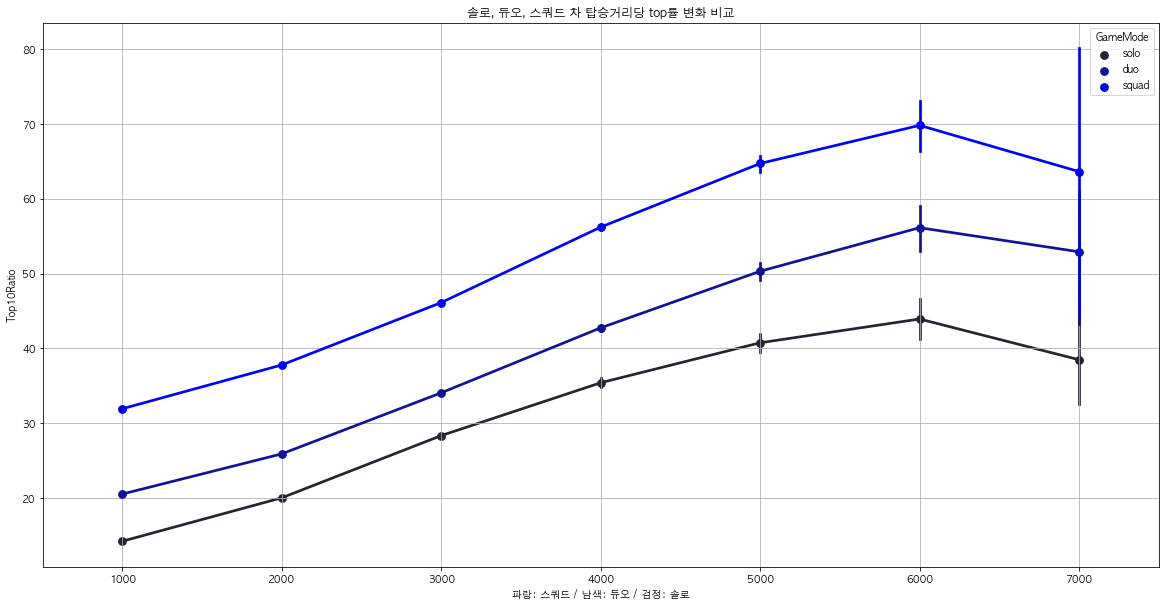

In [30]:
create_range_data(total_ratio,"RideDistancePg",0,7000,1000)


plt.figure(figsize=(20,10))
sns.pointplot(x='RideDistancePg_range',y='Top10Ratio',hue='GameMode', data=total_ratio,color='blue')
plt.title("솔로, 듀오, 스쿼드 차 탑승거리당 top률 변화 비교")
plt.xlabel("파랑: 스쿼드 / 남색: 듀오 / 검정: 솔로")
plt.grid()
plt.show()
drop_col(total_ratio,'RideDistancePg')

* 차를 타고 이동한 거리가 증가할수록 top10확률이 상승한다. 

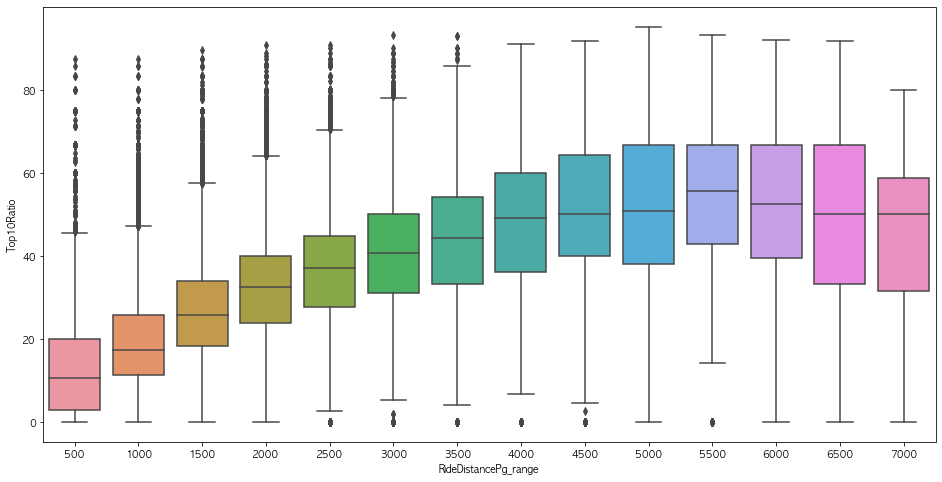

In [31]:
create_range_data(total_ratio,"RideDistancePg",0,7000,500)

plt.figure(figsize=(16,8))
sns.boxplot(x='RideDistancePg_range',y='Top10Ratio', data=total_ratio)
plt.show()
drop_col(total_ratio, 'RideDistancePg')

## 2. 뉴비 플레이어가 안정적으로 top10에 들기 위해서는 어떻게 플레이해야할까?

### 1) 솔로, 듀오, 스쿼드 3가지 모드 중 어떤 모드에서 뉴비가 생존에 유리한가.

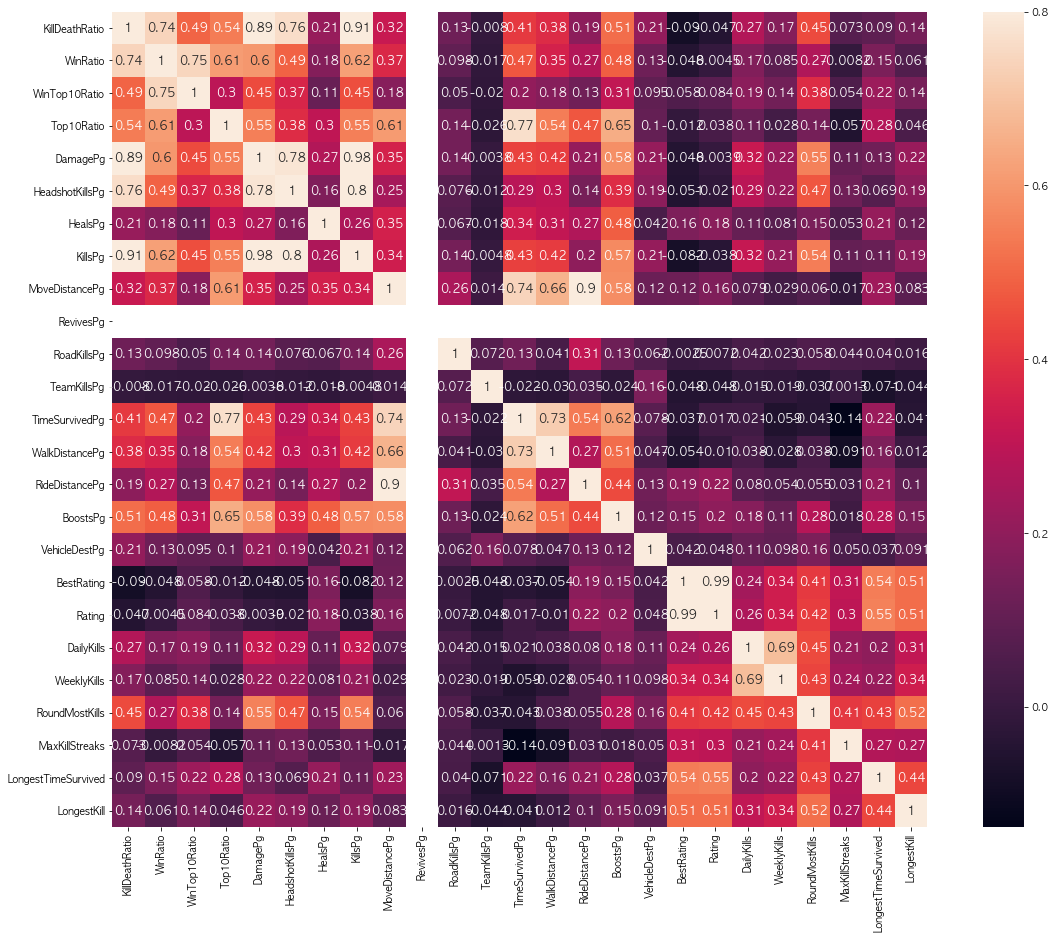

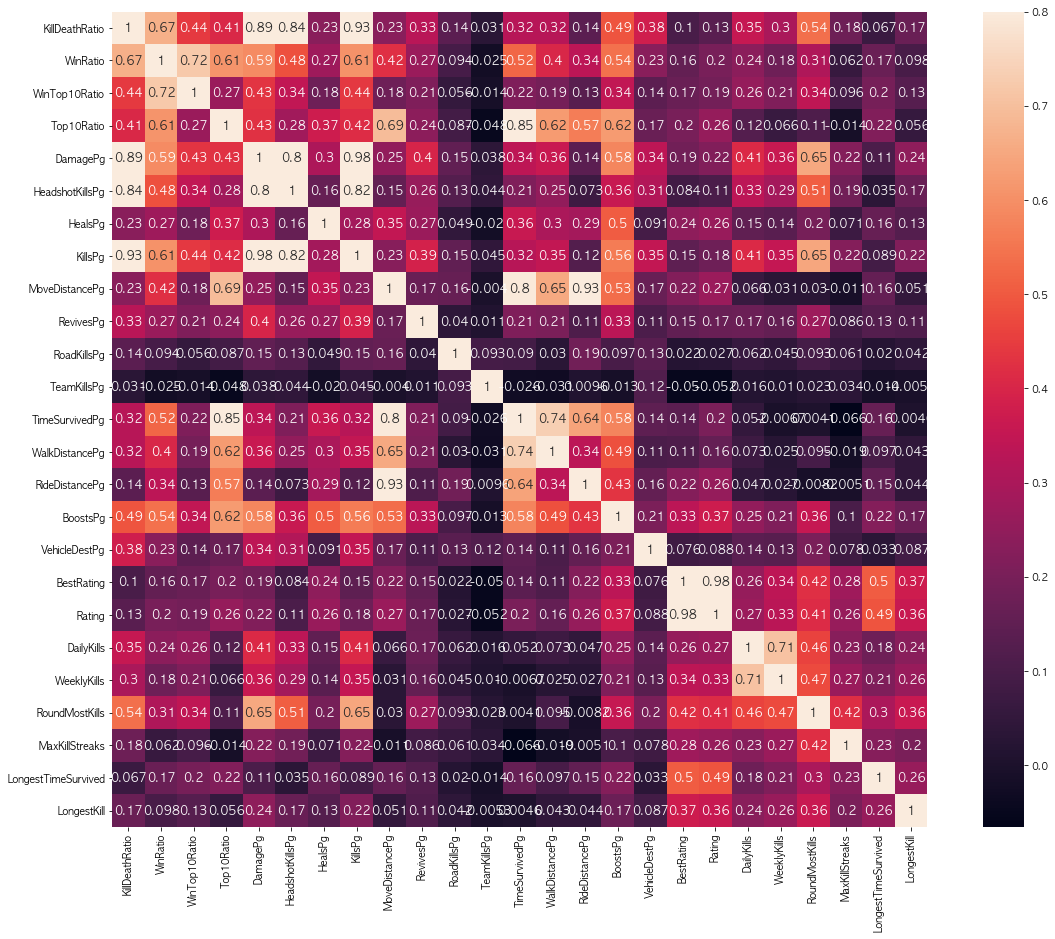

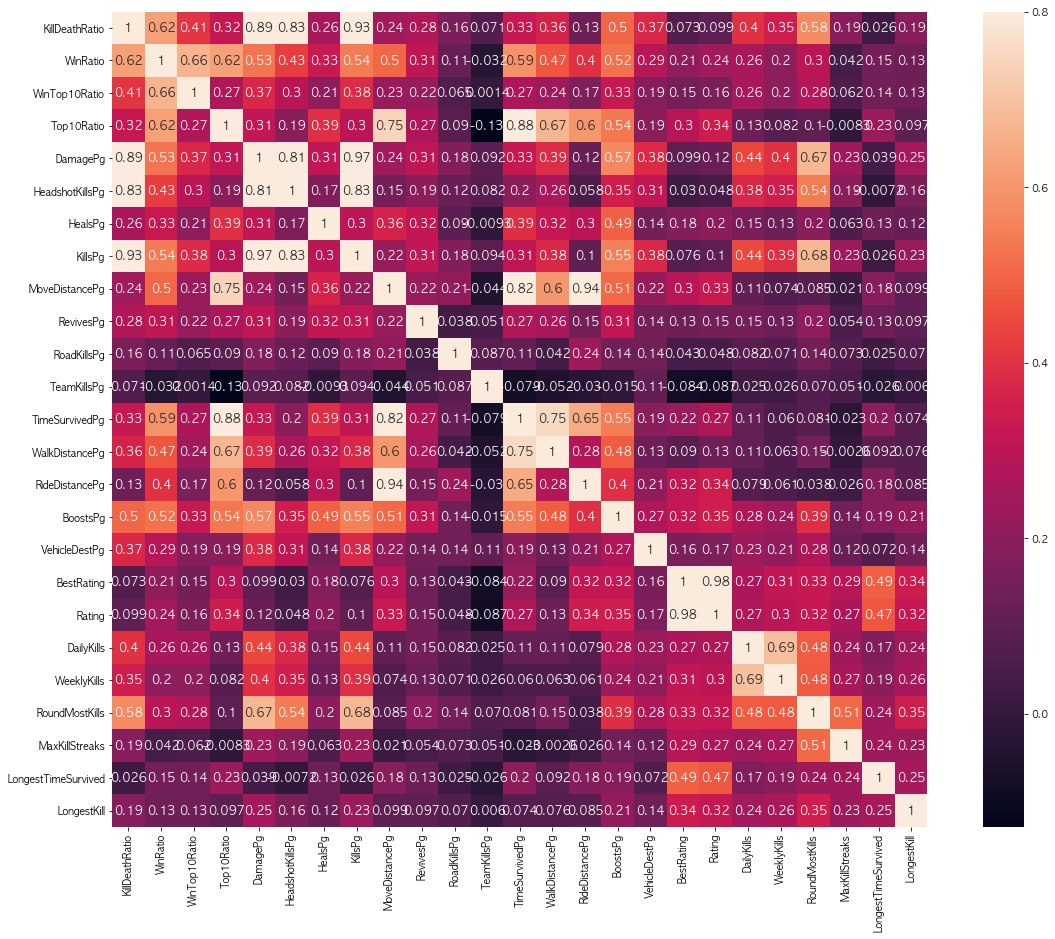

In [32]:
ls_heatmap = ['solo', 'duo', 'squad']
for value in ls_heatmap:
    globals()[f'corrmat_{value}'] = total_ratio[total_ratio['GameMode']==value].corr()
    f, ax = plt.subplots(figsize=(20, 15))
    sns.heatmap(globals()[f'corrmat_{value}'], vmax=.8, 
                square=True, annot=True, annot_kws={"size": 12});

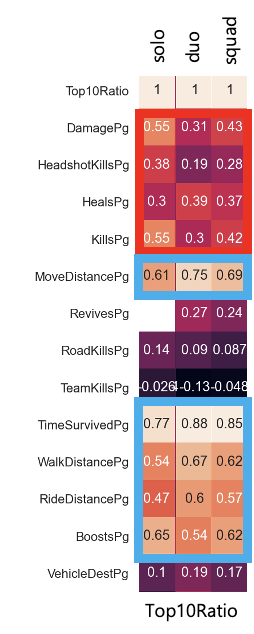
- (k/d, 데미지, 킬수 등) 총 쏘는 실력과 관련된 컬럼은 squad -> duo -> solo 일수록 더 높은 상관계수를 보인다.
=> 솔로모드에서는 top10에 들기 위해서는 플레이어 개인의 에임실력이 중요하다.
- 그 외(아이템 사용 및 이동관련)의 컬럼은 solo -> duo -> squad 일수록 더 높은 상관관계를 보인다.
=> 팀원이 많은 모드일수록, 아이템의 사용방법과 이동방식과 같은 플레이어의 운영능력이 top10에 들 확률을 좌우한다.
### - 뉴비가 Top10에 쉽게 들기 위해서는 '스쿼드'모드를 플레이하는 것이 가장 유리하다!

## 2) 게임당 최소 적에게 주어야할 데미지, 최소 몇 킬을 기록해야 하는가.

squad 승률 25%이하 평균 : 1.152386246122027
squad 승률 50%이하 평균 : 1.2889908026405774
squad 승률 75%이하 평균 : 2.011600242067952
squad 승률 100%이하 평균 : 3.9380858085808583


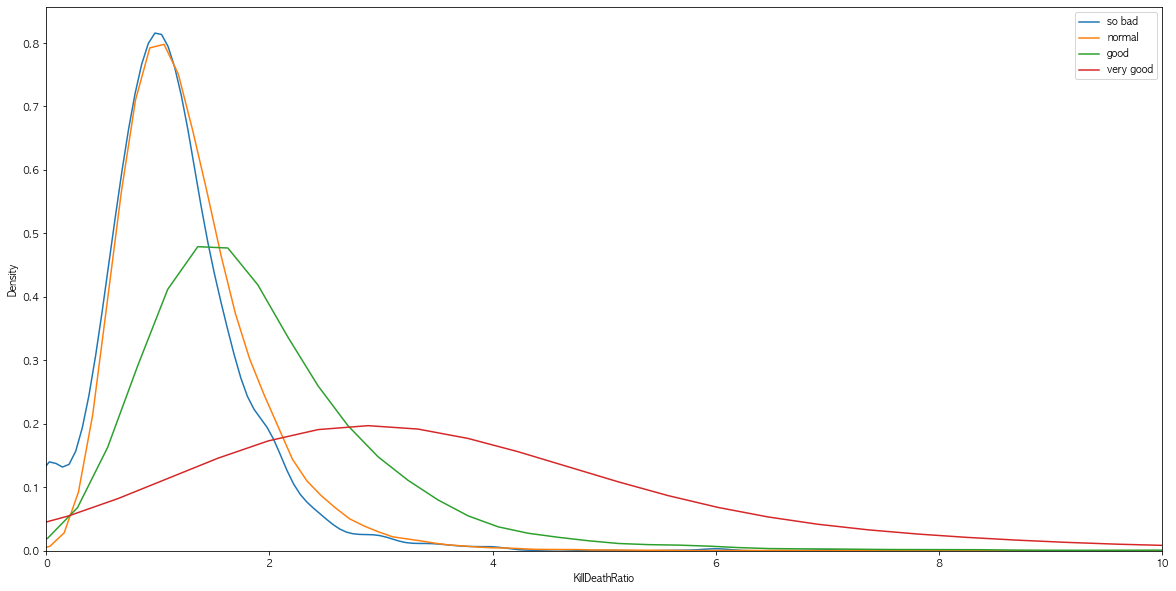

In [33]:
create_range_data(total_ratio,'Top10Ratio',0,100,25)

plt.figure(figsize=(20,10))
for gb in total_ratio['Top10Ratio_range'].unique():
    df = total_ratio[(total_ratio['Top10Ratio_range']==gb)&(total_ratio['GameMode']=='squad')]
    sns.distplot(df['KillDeathRatio'], bins=10, hist=False,kde=True)
    plt.legend(['so bad','normal','good','very good'])
    plt.xlim(0,10)
    print(f'squad 승률 {gb}%이하 평균 :',df['KillDeathRatio'].mean())
    
plt.show()

### Kill/Death는 얼마를 기록해야 할까?

- 게임 모드는 스쿼드로 하며, 한판당 3.9킬정도 했을때 승률을 최고로 높일 수 있다.  
    - 뉴비는 top10 진입확률 50~75%의 평균인 KD 2.0을 목표로 하는 것이 현실적

squad 승률 25%이하 평균 : 155.57068769389866
squad 승률 50%이하 평균 : 169.94079580187295
squad 승률 75%이하 평균 : 231.45372352381779
squad 승률 100%이하 평균 : 323.886303630363


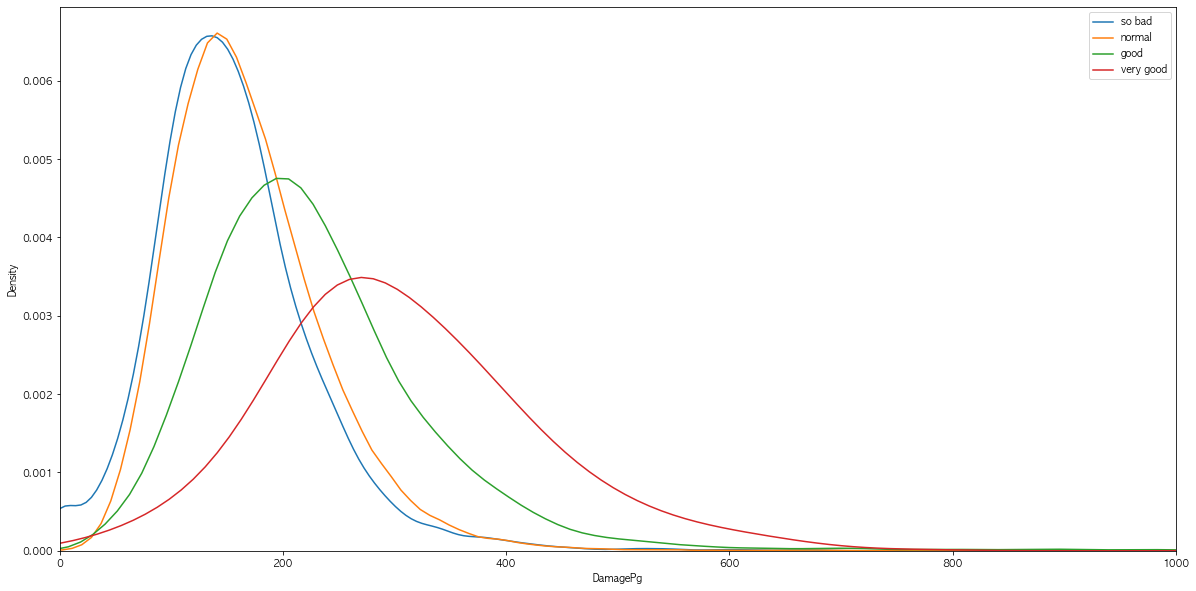

In [34]:
create_range_data(total_ratio,'Top10Ratio',0,100,25)

plt.figure(figsize=(20,10))
for gb in total_ratio['Top10Ratio_range'].unique():
    df = total_ratio[(total_ratio['Top10Ratio_range']==gb)&(total_ratio['GameMode']=='squad')]
    sns.distplot(df['DamagePg'], bins=10, hist=False,kde=True)
    plt.legend(['so bad','normal','good','very good'])
    plt.xlim(0,1000)
    print(f'squad 승률 {gb}%이하 평균 :',df['DamagePg'].mean())
    
plt.show()

drop_col(total_ratio, "Top10Ratio")

### 게임 한판 당 데미지는 얼마를 기록해야 할까?
- 한판당 평균 데미지의 양을 323이상 기록하면 Top10 진입확률을 최대로 할 수 있다.
- 뉴비는 한판당 적에게 주는 데미지 목표를 231로 하면 top10확률이 50~75%로 평균을 상회할 수 있다.

## 3) 생존률을 높이기 위해 게임당 부스트아이템, 회복아이템은 얼마나 써야 하는가.

squad 승률 25%이하 평균 : 1.4133376421923474
squad 승률 50%이하 평균 : 1.8574551646173818
squad 승률 75%이하 평균 : 2.3908135212241723
squad 승률 100%이하 평균 : 2.8631848184818485


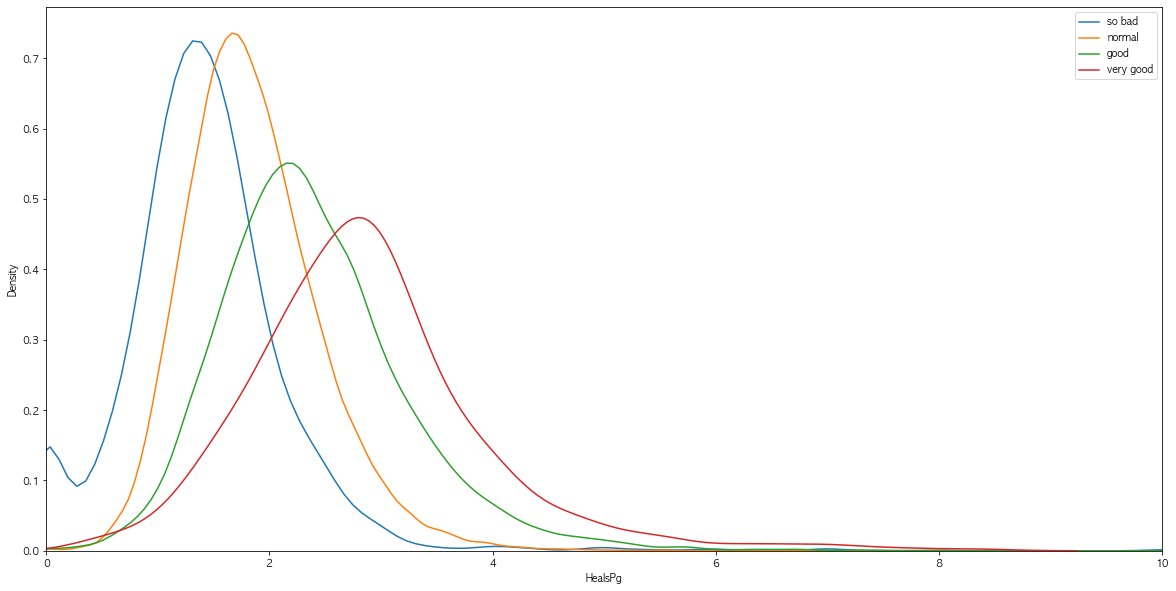

In [35]:
create_range_data(total_ratio,'Top10Ratio',0,100,25)

plt.figure(figsize=(20,10))
for gb in total_ratio['Top10Ratio_range'].unique():
    df = total_ratio[(total_ratio['Top10Ratio_range']==gb)&(total_ratio['GameMode']=='squad')]
    sns.distplot(df['HealsPg'], bins=10, hist=False,kde=True)
    plt.legend(['so bad','normal','good','very good'])
    plt.xlim(0,10)
    print(f'squad 승률 {gb}%이하 평균 :',df['HealsPg'].mean())
    
plt.show()

drop_col(total_ratio, "Top10Ratio")

### 회복아이템은 몇개나 필요할까?
* 승률 75%이상을 기준으로 회복아이템은 약 2.8개 이상 사용하는 것이 이상적이다.

squad 승률 25%이하 평균 : 0.8297112627100625
squad 승률 50%이하 평균 : 1.1863236429050554
squad 승률 75%이하 평균 : 1.696512596752069
squad 승률 100%이하 평균 : 2.3510609685559163


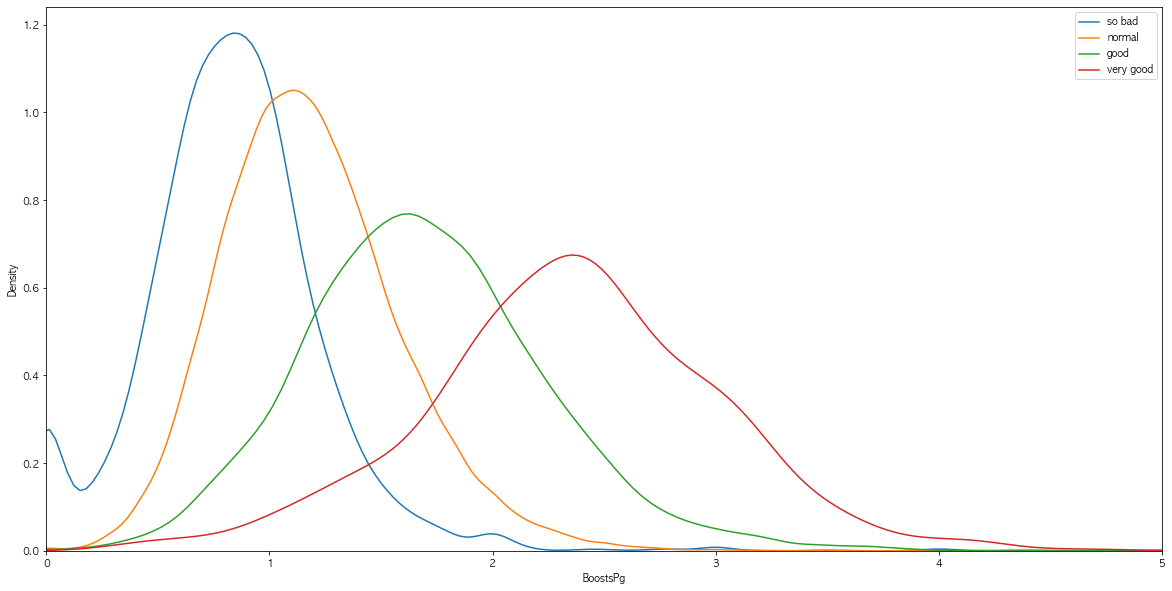

In [36]:
create_range_data(total_ratio,'Top10Ratio',0,100,25)

plt.figure(figsize=(20,10))
for gb in total_ratio['Top10Ratio_range'].unique():
    df = total_ratio[(total_ratio['Top10Ratio_range']==gb)&(total_ratio['GameMode']=='squad')]
    sns.distplot(df['BoostsPg'], bins=10, hist=False,kde=True)
    plt.legend(['so bad','normal','good','very good'])
    plt.xlim(0,5)
    print(f'squad 승률 {gb}%이하 평균 :',df['BoostsPg'].mean())
    
plt.show()

drop_col(total_ratio,"Top10Ratio")

### 부스트아이템은 최소 몇개를 사용해야 할까?
* top10에 들 확률이 높은 그룹은 게임당 부스트아이템의 사용갯수에서 확실한 차이를 보인다.
* 승률 75%이상을 기준으로 부스트아이템은 약 2개 이상 사용하는 것이 이상적이다.

## 4) 플레이어의 생존 확률을 높이기 위한 효율적인 이동전략은 무엇인가.

squad 승률 25%이하 평균 : 2313.253508273009
squad 승률 50%이하 평균 : 3189.461996762083
squad 승률 75%이하 평균 : 4360.5865721448945
squad 승률 100%이하 평균 : 5860.031881188119


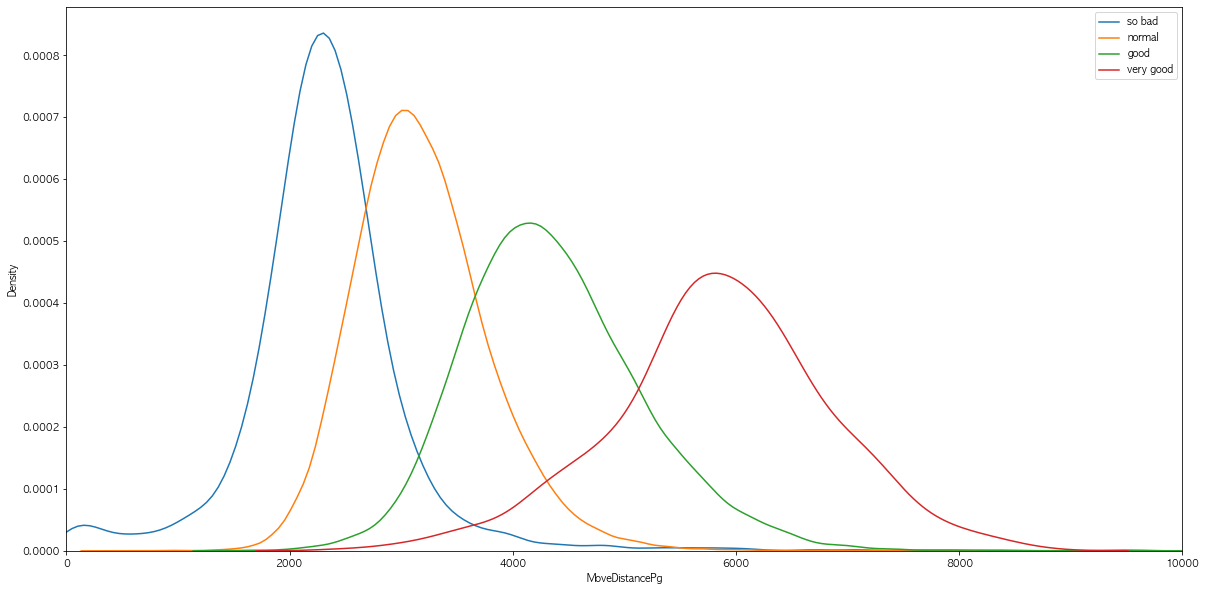

In [37]:
# top10 확률 별 이동거리 분포 

create_range_data(total_ratio,'Top10Ratio',0,100,25)

plt.figure(figsize=(20,10))
for gb in total_ratio['Top10Ratio_range'].unique():
    df = total_ratio[(total_ratio['Top10Ratio_range']==gb)&(total_ratio['GameMode']=='squad')]
    sns.distplot(df['MoveDistancePg'], bins=10, hist=False,kde=True)
    plt.legend(['so bad','normal','good','very good'])
    plt.xlim(0,10000)
    print(f'squad 승률 {gb}%이하 평균 :',df['MoveDistancePg'].mean())
    
plt.show()

drop_col(total_ratio,"Top10Ratio")

* top10에 들 확률이 높은 그룹일 수록 이동거리가 많다는 것을 알 수 있다. 

#### 가설6 결론
* 이동거리가 많을수록 top10에 들 가능성이 높아진다.
* top10에 들 확률을 75%이상으로 높이기 위해서는 약 6000m 이동하는 것이 이상적

squad 승률 25%이하 평균 : 1211.5108272627606
squad 승률 50%이하 평균 : 1550.2585986080092
squad 승률 75%이하 평균 : 1929.7587764977177
squad 승률 100%이하 평균 : 2212.2188810756593


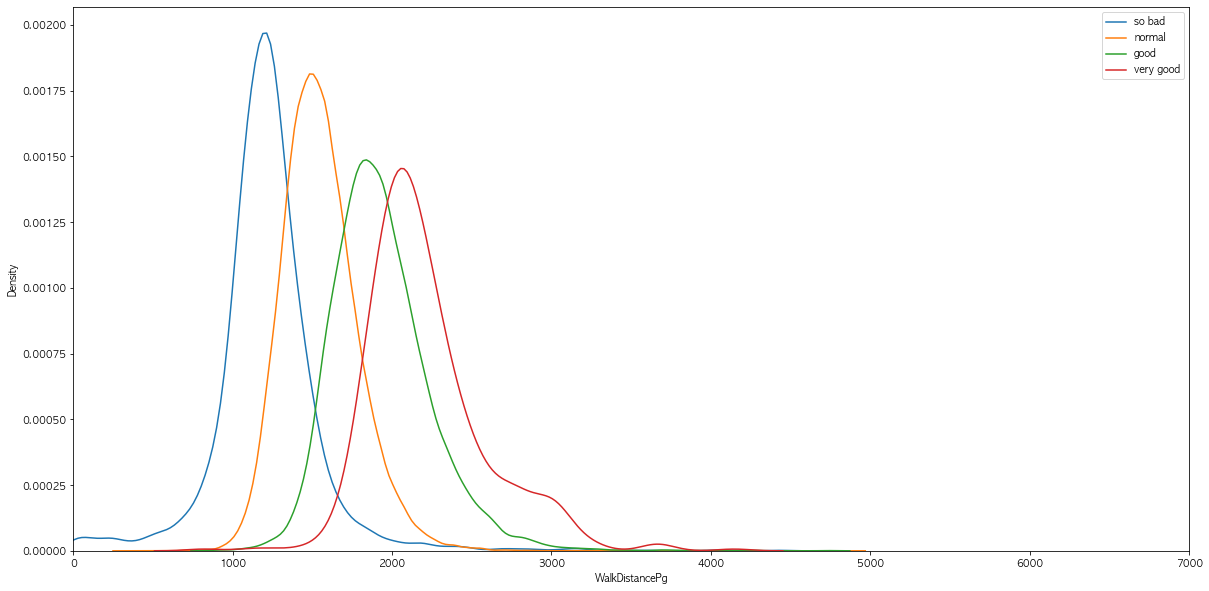

In [38]:
# top10확률 별 걸어서 이동한거리 비교
create_range_data(total_ratio,'Top10Ratio',0,100,25)

plt.figure(figsize=(20,10))
for gb in total_ratio['Top10Ratio_range'].unique():
    df = total_ratio[(total_ratio['Top10Ratio_range']==gb)&(total_ratio['GameMode']=='squad')]
    sns.distplot(df['WalkDistancePg'], bins=10, hist=False,kde=True)
    plt.legend(['so bad','normal','good','very good'])
    plt.xlim(0,7000)
    print(f'squad 승률 {gb}%이하 평균 :',df['WalkDistancePg'].mean())
    
plt.show()

drop_col(total_ratio,"Top10Ratio")

* 승률이 높은 그룹일 수록 걸어서 이동하는 거리가 많다.

#### 가설7 결론
* 걷는거리가 많을수록 top10확률 높아진다.
* top10확률 75~100%대로 높이고 싶다면, 걸어서 이동하는 거리를 약 2000m정도 높이는 것이 좋다.

squad 승률 25%이하 평균 : 1101.742651480982
squad 승률 50%이하 평균 : 1639.2033707524822
squad 승률 75%이하 평균 : 2430.8277378970884
squad 승률 100%이하 평균 : 3647.813069756917


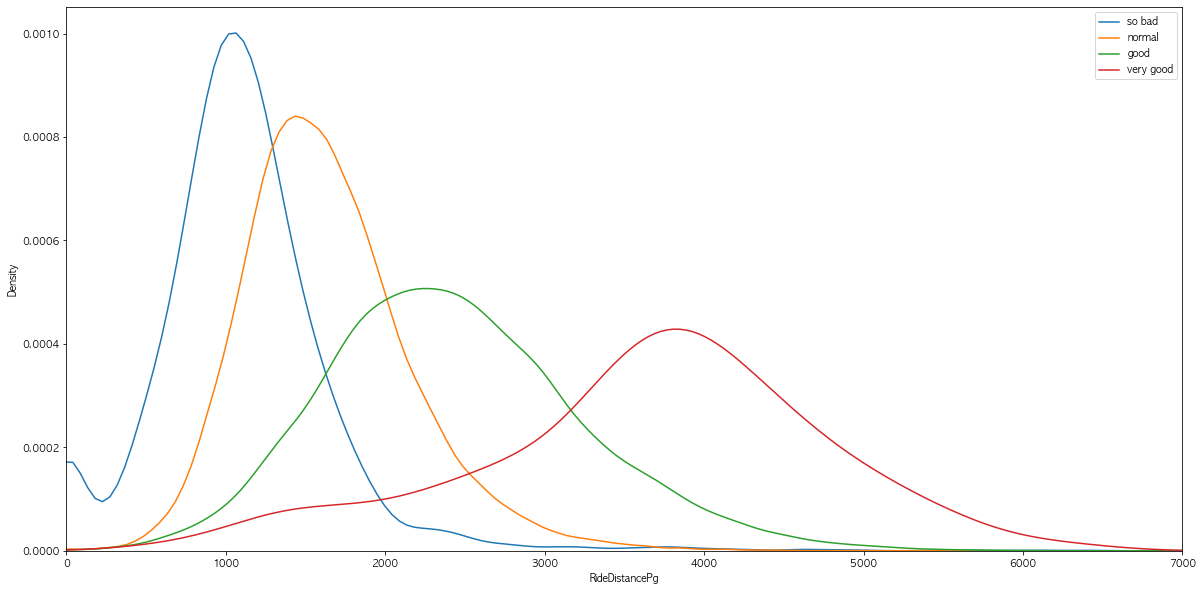

In [39]:
# 승률에 따라 차타고 이동한 거리를 비교해보자.
create_range_data(total_ratio,'Top10Ratio',0,100,25)

plt.figure(figsize=(20,10))
for gb in total_ratio['Top10Ratio_range'].unique():
    df = total_ratio[(total_ratio['Top10Ratio_range']==gb)&(total_ratio['GameMode']=='squad')]
    sns.distplot(df['RideDistancePg'], bins=10, hist=False,kde=True)
    plt.legend(['so bad','normal','good','very good'])
    plt.xlim(0,7000)
    print(f'squad 승률 {gb}%이하 평균 :',df['RideDistancePg'].mean())
    
plt.show()

drop_col(total_ratio,"Top10Ratio")

* top10확률이 가장 높은 플레이어 그룹은 게임당 약 3500m를 차를타고 이동 
* 확실히 승률이 높은 그룹과 낮은 그룹 간 탈것을 이용한 이동거리에서 큰 차이가 남을 확인할 수 있음.

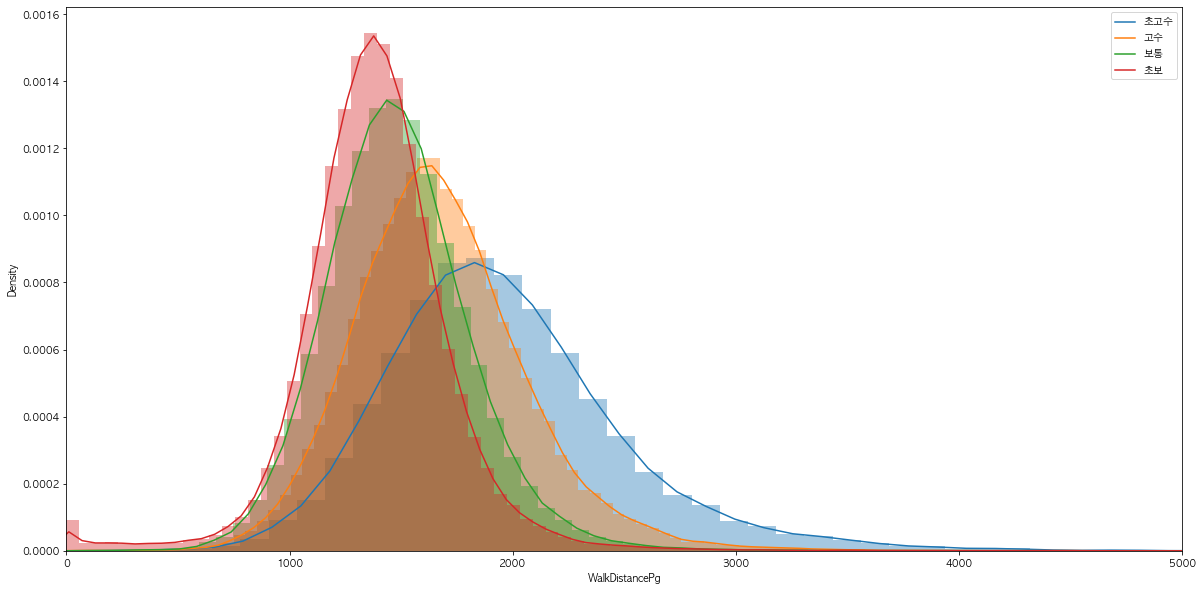

In [40]:
# k/d 그룹별 걸어서 이동한 거리 비교
plt.figure(figsize=(20,10))
for gb in total_ratio['K/D_category'].unique():
    sns.distplot(total_ratio[total_ratio['K/D_category']==gb]['WalkDistancePg'],bins=200, kde=True)
    plt.legend(['초고수','고수','보통','초보'])
plt.xlim(0,5000)
plt.show()

* k/d가 높으면 걸어서 이동한 거리도 증가하는 모습을 보인다.
* 걸어서 이동할 경우 교전상황이 많이 발생하고, 당연히 k/d가 높은 플레이어가 생존확률이 높기때문에, 일반적으로 걸어서 이동하는 거리가 더 많다.

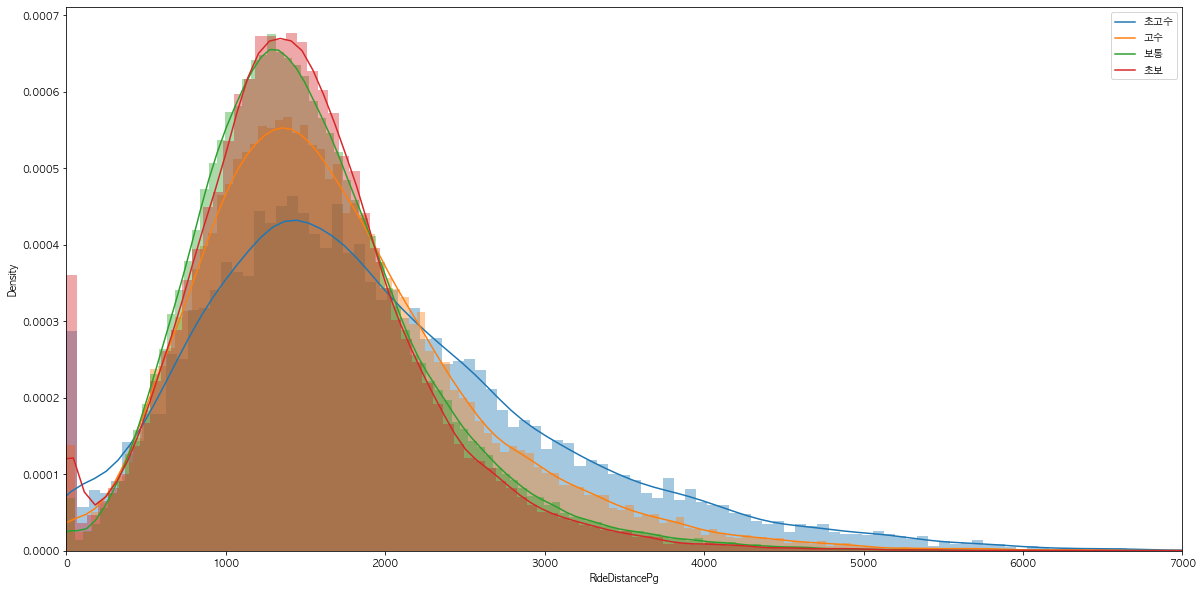

In [41]:
# 차타고 이동한 거리 비교
plt.figure(figsize=(20,10))
for gb in total_ratio['K/D_category'].unique():
    sns.distplot(total_ratio[total_ratio['K/D_category']==gb]['RideDistancePg'],bins=200, kde=True)
    plt.legend(['초고수','고수','보통','초보'])
plt.xlim(0,7000)
plt.show()

* 차를 타고 이동한 거리는 대체로 게임당 1000~2000m사이로 k/d수치가 높은 그룹과 가장 낮은 그룹 간에 큰 차이가 나지 않는다. 

### 생존률을 극대화하기 위한 효율적인 이동전략은 무엇인가?
* top10에 들 확률로 나눈 범주 간 RideDistance가 확연한 차이를 보이는 것을 감안했을 때, 탈것을 적극적으로 이용하는 것이 top10에 들어갈 매우 효율적인 전략이 될 것.
* 탈것을 이용하여 3500m이상 이동한다면 생존률을 비약적으로 높일 수 있다.

---

## 최종 결론 

#### Top10에 들 확률을 높이기 위해서는 어떻게 플레이 해야할까?

1) 뉴비에게 어떤 모드가 쉬울까?
- 팀원이 많은 모드일수록 에임실력보다는 아이템의 활용과 이동전략이 생존에 중요한 영향을 미친다.
- 따라서 뉴비는 스쿼드모드를 플레이어해야 Top10을 쉽게 할 수 있다.

2) 게임당 적을 몇명 kill할 수 있어야 하는가.(스쿼드 기준 top10확률 50~75%)
- Kill/Death : 약 2.0 이상
- 게임당 Damage : 231 (한명을 죽이기 위해 필요한 데미지: 100)

3) 게임당 아이템을 얼마나 필요한가.(스쿼드 기준 top10확률 75%이상)
- 회복아이템 : 약 3개 이상 (2.8)
- 부스트아이템 : 약 2개 이상 (2.3)

4) 생존률을 극대화 하기 위해서는 어떤 이동전략을 취해야 하는가.(스쿼드 기준)
- k/d에 따라 구분한 그룹 간 Ride Distance의 차이가 작음에도, Ride Distance가 길면 top10확률이 비약적으로 높아짐을 확인함.
- 걸어서 이동하는 것보다 탈 것을 적극적으로 활용하는 것이 생존률을 극대화할 수 있음.
- 이동거리 : 많으면 많을수록 좋다. 약 5000M이상
- (걸어서 이동: 약 2000m 이상, 차타고 이동: 약 3000m 이상)

